In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/final_dataset.csv')

# Display the first few rows to verify
display(df.head())

Unnamed: 0  meta_fixture_event meta_fixture_team_a  meta_fixture_finished_provisional                         meta_name                                    meta_merger_col  target_bps  \
0           0                   1         Bournemouth                               True                        Alex Scott        Alex Scott---Nott'ham Forest vs Bournemouth          11   
1           1                   1         Bournemouth                               True  Carlos Miguel dos Santos Pereira  Carlos Miguel dos Santos Pereira---Nott'ham Fo...           0   
2           2                   1              Wolves                               True                 Tomiyasu Takehiro              Tomiyasu Takehiro---Arsenal vs Wolves           0   
3           3                   1      Crystal Palace                               True                   Malcolm Ebiowei      Malcolm Ebiowei---Brentford vs Crystal Palace           0   
4           4                   1         Southampton                               True                 Ben Brereton Díaz   Ben Brereton Díaz---Newcastle Utd vs Southampton          -2   

   meta_fixture_provisional_start_time                 meta_match-name  meta_fixture_minutes  meta_fixture_team_h_score meta_position  meta_fixture  meta_fixture_team_a_score  meta_fixture_code  \
0                                False  Nott'ham Forest vs Bournemouth                    90                          1           MID             6                          1            2444475   
1                                False  Nott'ham Forest vs Bournemouth                    90                          1            GK             6                          1            2444475   
2                                False               Arsenal vs Wolves                    90                          2           DEF             2                          0            2444471   
3                                False     Brentford vs Crystal Palace                    90                          2           MID             8                          1            2444477   
4                                False    Newcastle Utd vs Southampton                    90                          1           MID             5                          0            2444474   

   meta_fixture_team_h_difficulty  target_bonus  meta_fixture_kickoff_time  meta_fixture_finished  target_minutes  target_total_points  meta_fixture_id  meta_fixture_pulse_id  \
0                               3             0  2024-08-17 14:00:00+00:00                   True              62                    2                6                 115832   
1                               3             0  2024-08-17 14:00:00+00:00                   True               0                    0                6                 115832   
2                               3             0  2024-08-17 14:00:00+00:00                   True               0                    0                2                 115828   
3                               3             0  2024-08-18 13:00:00+00:00                   True               0                    0                8                 115834   
4                               1             0  2024-08-17 14:00:00+00:00                   True              70                    1                5                 115831   

   meta_fixture_team_a_difficulty  meta_fixture_started meta_fixture_team_h                                 meta_fixture_stats meta_Age meta_mapping_name meta_Nation meta_Pos    meta_Away  \
0                               4                  True     Nott'ham Forest  [{'identifier': 'goals_scored', 'a': [{'value'...   20-362        alex scott     eng ENG       DM  Bournemouth   
1                               4                  True     Nott'ham Forest  [{'identifier': 'goals_scored', 'a': [{'value'...      NaN               NaN         NaN      NaN          NaN   
2                               5          

In [ ]:
"""
Fantasy Premier League (FPL) - Complete Exploratory Data Analysis
==================================================================
A comprehensive EDA with beautiful visualizations using plotly, seaborn, and matplotlib
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

# ============================================================================
# 1. LOAD DATA
# ============================================================================

def load_data(filepath):
    """Load the FPL dataset"""
    print("Loading data...")
    df = pd.read_csv(filepath)
    print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    return df

# ============================================================================
# 2. DATA OVERVIEW
# ============================================================================

def data_overview(df):
    """Print comprehensive data overview"""
    print("\n" + "="*80)
    print("DATA OVERVIEW")
    print("="*80)

    print(f"\nDataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print("\n--- Target Variable Statistics ---")
    print(df['target_total_points'].describe())

    print("\n--- Missing Values (Top 20) ---")
    missing = df.isnull().sum().sort_values(ascending=False).head(20)
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
    print(missing_df)

    print("\n--- Data Types ---")
    print(df.dtypes.value_counts())

    return df

# ============================================================================
# 3. TARGET VARIABLE ANALYSIS
# ============================================================================

def analyze_target_variable(df):
    """Analyze target_total_points distribution"""
    print("\n" + "="*80)
    print("TARGET VARIABLE ANALYSIS")
    print("="*80)

    target = df['target_total_points'].dropna()

    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Points Distribution', 'Box Plot',
                       'Cumulative Distribution', 'Density Plot'),
        specs=[[{'type': 'bar'}, {'type': 'box'}],
               [{'type': 'scatter'}, {'type': 'scatter'}]]
    )

    # Histogram
    fig.add_trace(
        go.Histogram(x=target, nbinsx=50, name='Points',
                    marker_color='rgb(99, 110, 250)'),
        row=1, col=1
    )

    # Box plot
    fig.add_trace(
        go.Box(y=target, name='Points', marker_color='rgb(239, 85, 59)'),
        row=1, col=2
    )

    # Cumulative distribution
    sorted_target = np.sort(target)
    cumulative = np.arange(1, len(sorted_target) + 1) / len(sorted_target)
    fig.add_trace(
        go.Scatter(x=sorted_target, y=cumulative, mode='lines',
                  name='CDF', line=dict(color='rgb(0, 204, 150)', width=3)),
        row=2, col=1
    )

    # Density plot (KDE approximation)
    from scipy import stats
    density = stats.gaussian_kde(target)
    xs = np.linspace(target.min(), target.max(), 200)
    fig.add_trace(
        go.Scatter(x=xs, y=density(xs), mode='lines', fill='tozeroy',
                  name='Density', line=dict(color='rgb(171, 99, 250)', width=2)),
        row=2, col=2
    )

    fig.update_layout(height=800, showlegend=False,
                     title_text="Target Variable (total_points) - Comprehensive Analysis",
                     title_font_size=20)
    fig.show()

    # Statistics
    print(f"\nMean: {target.mean():.2f}")
    print(f"Median: {target.median():.2f}")
    print(f"Std Dev: {target.std():.2f}")
    print(f"Skewness: {target.skew():.2f}")
    print(f"Kurtosis: {target.kurtosis():.2f}")
    print(f"Min: {target.min():.2f}, Max: {target.max():.2f}")

# ============================================================================
# 4. POSITION-BASED ANALYSIS
# ============================================================================

def analyze_by_position(df):
    """Analyze performance by player position"""
    print("\n" + "="*80)
    print("POSITION-BASED ANALYSIS")
    print("="*80)

    # Clean position data
    df['position_clean'] = df['meta_Pos'].fillna('Unknown').apply(
        lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown'
    )

    # Aggregate by position
    pos_stats = df.groupby('position_clean').agg({
        'target_total_points': ['mean', 'median', 'std', 'count'],
        'target_minutes': 'mean',
        'target_bonus': 'mean',
        'feature_goals_scored_last_1000_days': 'mean',
        'feature_assists_last_1000_days': 'mean'
    }).round(2)

    pos_stats.columns = ['_'.join(col) for col in pos_stats.columns]
    pos_stats = pos_stats.sort_values('target_total_points_mean', ascending=False)
    print("\n", pos_stats)

    # Visualizations
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Avg Points by Position', 'Points Distribution by Position',
                       'Avg Minutes by Position', 'Avg Bonus by Position')
    )

    # Average points
    fig.add_trace(
        go.Bar(x=pos_stats.index, y=pos_stats['target_total_points_mean'],
              marker_color='rgb(55, 83, 109)', name='Avg Points'),
        row=1, col=1
    )

    # Box plot by position
    for pos in df['position_clean'].unique():
        if pos != 'Unknown':
            pos_data = df[df['position_clean'] == pos]['target_total_points'].dropna()
            fig.add_trace(
                go.Box(y=pos_data, name=pos, boxmean='sd'),
                row=1, col=2
            )

    # Average minutes
    fig.add_trace(
        go.Bar(x=pos_stats.index, y=pos_stats['target_minutes_mean'],
              marker_color='rgb(26, 118, 255)', name='Avg Minutes'),
        row=2, col=1
    )

    # Average bonus
    fig.add_trace(
        go.Bar(x=pos_stats.index, y=pos_stats['target_bonus_mean'],
              marker_color='rgb(50, 171, 96)', name='Avg Bonus'),
        row=2, col=2
    )

    fig.update_layout(height=900, showlegend=False,
                     title_text="Position-Based Performance Analysis",
                     title_font_size=20)
    fig.show()

# ============================================================================
# 5. TOP PERFORMERS ANALYSIS
# ============================================================================

def analyze_top_performers(df, top_n=20):
    """Identify and analyze top performing players"""
    print("\n" + "="*80)
    print(f"TOP {top_n} PERFORMERS ANALYSIS")
    print("="*80)

    # Calculate per-player statistics
    player_stats = df.groupby('meta_name').agg({
        'target_total_points': ['sum', 'mean', 'count'],
        'target_minutes': 'sum',
        'feature_goals_scored_last_1000_days': 'sum',
        'feature_assists_last_1000_days': 'sum',
        'meta_Pos': 'first'
    }).round(2)

    player_stats.columns = ['total_points', 'avg_points', 'games',
                           'total_minutes', 'goals', 'assists', 'position']
    player_stats = player_stats[player_stats['games'] >= 5]  # Minimum 5 games
    player_stats = player_stats.sort_values('avg_points', ascending=False).head(top_n)

    print("\n", player_stats)

    # Visualization
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(f'Top {top_n} Players by Avg Points',
                       f'Top {top_n} Players by Total Points')
    )

    # Top by average
    fig.add_trace(
        go.Bar(y=player_stats.index, x=player_stats['avg_points'],
              orientation='h', marker_color='rgb(158, 202, 225)',
              text=player_stats['avg_points'], textposition='outside'),
        row=1, col=1
    )

    # Top by total
    top_total = player_stats.sort_values('total_points', ascending=True).tail(top_n)
    fig.add_trace(
        go.Bar(y=top_total.index, x=top_total['total_points'],
              orientation='h', marker_color='rgb(107, 174, 214)',
              text=top_total['total_points'], textposition='outside'),
        row=1, col=2
    )

    fig.update_layout(height=800, showlegend=False,
                     title_text="Top Performers Analysis",
                     title_font_size=20)
    fig.update_xaxes(title_text="Average Points", row=1, col=1)
    fig.update_xaxes(title_text="Total Points", row=1, col=2)
    fig.show()

# ============================================================================
# 6. FEATURE CORRELATION ANALYSIS
# ============================================================================

def correlation_analysis(df):
    """Analyze correlations between features and target"""
    print("\n" + "="*80)
    print("FEATURE CORRELATION ANALYSIS")
    print("="*80)

    # Select relevant features
    feature_cols = [col for col in df.columns if col.startswith('feature_') and
                   df[col].dtype in ['float64', 'int64']]

    # Calculate correlations with target
    correlations = df[feature_cols + ['target_total_points']].corr()['target_total_points'].drop('target_total_points')
    correlations = correlations.sort_values(ascending=False)

    # Top positive and negative correlations
    top_corr = pd.concat([correlations.head(15), correlations.tail(15)])

    print("\nTop 15 Positive Correlations:")
    print(correlations.head(15))
    print("\nTop 15 Negative Correlations:")
    print(correlations.tail(15))

    # Visualization
    fig = go.Figure()

    colors = ['rgb(0, 204, 150)' if x > 0 else 'rgb(239, 85, 59)'
             for x in top_corr.values]

    fig.add_trace(go.Bar(
        y=[col.replace('feature_', '').replace('_last_1000_days', '')
           for col in top_corr.index],
        x=top_corr.values,
        orientation='h',
        marker_color=colors,
        text=top_corr.values.round(3),
        textposition='outside'
    ))

    fig.update_layout(
        title="Top Features Correlated with Total Points",
        title_font_size=20,
        xaxis_title="Correlation Coefficient",
        yaxis_title="Feature",
        height=800,
        showlegend=False
    )
    fig.show()

    # Correlation heatmap for top features
    top_features = correlations.abs().nlargest(20).index.tolist()
    corr_matrix = df[top_features + ['target_total_points']].corr()

    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=[col.replace('feature_', '').replace('_last_1000_days', '')[:20]
           for col in corr_matrix.columns],
        y=[col.replace('feature_', '').replace('_last_1000_days', '')[:20]
           for col in corr_matrix.index],
        colorscale='RdBu',
        zmid=0,
        text=corr_matrix.values.round(2),
        texttemplate='%{text}',
        textfont={"size": 8}
    ))

    fig.update_layout(
        title="Correlation Heatmap - Top 20 Features",
        title_font_size=20,
        height=900,
        width=1000
    )
    fig.show()

# ============================================================================
# 7. HOME VS AWAY ANALYSIS
# ============================================================================

def home_away_analysis(df):
    """Analyze home vs away performance"""
    print("\n" + "="*80)
    print("HOME VS AWAY ANALYSIS")
    print("="*80)

    # Create home/away indicator
    df['is_home'] = df['feature_was_home_last_1000_days'].apply(
        lambda x: 'Home' if x > 0.5 else 'Away' if x < 0.5 else 'Unknown'
    )

    # Compare statistics
    venue_stats = df.groupby('is_home').agg({
        'target_total_points': ['mean', 'median', 'std', 'count'],
        'target_minutes': 'mean',
        'feature_goals_scored_last_1000_days': 'mean',
        'feature_assists_last_1000_days': 'mean'
    }).round(2)

    print("\n", venue_stats)

    # Visualization
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Average Points by Venue', 'Points Distribution by Venue')
    )

    # Bar chart
    venue_means = df.groupby('is_home')['target_total_points'].mean()
    fig.add_trace(
        go.Bar(x=venue_means.index, y=venue_means.values,
              marker_color=['rgb(55, 83, 109)', 'rgb(26, 118, 255)'],
              text=venue_means.values.round(2), textposition='outside'),
        row=1, col=1
    )

    # Box plot
    for venue in ['Home', 'Away']:
        venue_data = df[df['is_home'] == venue]['target_total_points'].dropna()
        fig.add_trace(
            go.Box(y=venue_data, name=venue, boxmean='sd'),
            row=1, col=2
        )

    fig.update_layout(height=500, showlegend=True,
                     title_text="Home vs Away Performance Comparison",
                     title_font_size=20)
    fig.show()

# ============================================================================
# 8. MINUTES VS POINTS ANALYSIS
# ============================================================================

def minutes_vs_points_analysis(df):
    """Analyze relationship between minutes played and points"""
    print("\n" + "="*80)
    print("MINUTES VS POINTS ANALYSIS")
    print("="*80)

    # Sample for visualization
    sample = df[['target_minutes', 'target_total_points', 'meta_Pos']].dropna().sample(
        min(5000, len(df)), random_state=42
    )
    sample['position_clean'] = sample['meta_Pos'].apply(
        lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown'
    )

    # Scatter plot with trend line
    fig = px.scatter(sample, x='target_minutes', y='target_total_points',
                    color='position_clean', opacity=0.6,
                    title='Minutes Played vs Points Scored (by Position)',
                    labels={'target_minutes': 'Minutes Played',
                           'target_total_points': 'Total Points',
                           'position_clean': 'Position'},
                    trendline='ols', trendline_scope='overall')

    fig.update_layout(height=700, title_font_size=20)
    fig.show()

    # Binned analysis
    df['minutes_bin'] = pd.cut(df['target_minutes'], bins=10)
    binned_stats = df.groupby('minutes_bin')['target_total_points'].agg(['mean', 'count'])
    print("\nPoints by Minutes Played (Binned):")
    print(binned_stats)

# ============================================================================
# 9. EXPECTED VS ACTUAL PERFORMANCE
# ============================================================================

def expected_vs_actual_analysis(df):
    """Compare expected points (xP) with actual points"""
    print("\n" + "="*80)
    print("EXPECTED VS ACTUAL PERFORMANCE")
    print("="*80)

    # Filter valid data
    valid_data = df[['feature_xP_last_1000_days', 'target_total_points',
                     'meta_name']].dropna()

    # Calculate over/under performance
    valid_data['performance_diff'] = (valid_data['target_total_points'] -
                                     valid_data['feature_xP_last_1000_days'])

    # Top over/underperformers
    player_perf = valid_data.groupby('meta_name').agg({
        'feature_xP_last_1000_days': 'mean',
        'target_total_points': 'mean',
        'performance_diff': 'mean'
    }).round(2)

    print("\nTop 10 Overperformers:")
    print(player_perf.nlargest(10, 'performance_diff'))
    print("\nTop 10 Underperformers:")
    print(player_perf.nsmallest(10, 'performance_diff'))

    # Scatter plot
    sample = valid_data.sample(min(2000, len(valid_data)), random_state=42)

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=sample['feature_xP_last_1000_days'],
        y=sample['target_total_points'],
        mode='markers',
        marker=dict(size=5, opacity=0.6, color='rgb(99, 110, 250)'),
        name='Actual vs Expected'
    ))

    # Add diagonal line (perfect prediction)
    max_val = max(sample['feature_xP_last_1000_days'].max(),
                 sample['target_total_points'].max())
    fig.add_trace(go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        line=dict(color='red', dash='dash', width=2),
        name='Perfect Prediction'
    ))

    fig.update_layout(
        title='Expected Points vs Actual Points',
        title_font_size=20,
        xaxis_title='Expected Points (xP)',
        yaxis_title='Actual Points',
        height=700
    )
    fig.show()

# ============================================================================
# 10. ADVANCED METRICS ANALYSIS
# ============================================================================

def advanced_metrics_analysis(df):
    """Analyze advanced FPL and football metrics"""
    print("\n" + "="*80)
    print("ADVANCED METRICS ANALYSIS")
    print("="*80)

    # ICT Index components
    ict_cols = ['feature_influence_last_1000_days',
                'feature_creativity_last_1000_days',
                'feature_threat_last_1000_days',
                'feature_ict_index_last_1000_days']

    ict_data = df[ict_cols + ['target_total_points', 'meta_name']].dropna()

    # Player averages
    player_ict = ict_data.groupby('meta_name').mean().round(2)
    top_players = player_ict.nlargest(15, 'feature_ict_index_last_1000_days')

    # Radar chart for top players
    categories = ['Influence', 'Creativity', 'Threat', 'ICT Index']

    fig = go.Figure()

    for i, player in enumerate(top_players.head(5).index):
        values = [
            top_players.loc[player, 'feature_influence_last_1000_days'],
            top_players.loc[player, 'feature_creativity_last_1000_days'],
            top_players.loc[player, 'feature_threat_last_1000_days'],
            top_players.loc[player, 'feature_ict_index_last_1000_days']
        ]

        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=player
        ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True)),
        title='Top 5 Players - ICT Components Comparison',
        title_font_size=20,
        height=700
    )
    fig.show()

    # Expected goals and assists
    fig = make_subplots(rows=1, cols=2,
                       subplot_titles=('xG vs Actual Goals', 'xA vs Actual Assists'))

    goals_data = df[['feature_expected_goals_last_1000_days',
                    'feature_goals_scored_last_1000_days']].dropna().sample(
                        min(1000, len(df)), random_state=42)

    fig.add_trace(
        go.Scatter(x=goals_data['feature_expected_goals_last_1000_days'],
                  y=goals_data['feature_goals_scored_last_1000_days'],
                  mode='markers', marker=dict(size=5, opacity=0.6),
                  name='Goals'),
        row=1, col=1
    )

    assists_data = df[['feature_expected_assists_last_1000_days',
                      'feature_assists_last_1000_days']].dropna().sample(
                          min(1000, len(df)), random_state=42)

    fig.add_trace(
        go.Scatter(x=assists_data['feature_expected_assists_last_1000_days'],
                  y=assists_data['feature_assists_last_1000_days'],
                  mode='markers', marker=dict(size=5, opacity=0.6, color='orange'),
                  name='Assists'),
        row=1, col=2
    )

    fig.update_layout(height=500, showlegend=True,
                     title_text="Expected vs Actual: Goals and Assists",
                     title_font_size=20)
    fig.show()

# ============================================================================
# 11. TIME-BASED ANALYSIS
# ============================================================================

def time_based_analysis(df):
    """Analyze performance trends over time"""
    print("\n" + "="*80)
    print("TIME-BASED ANALYSIS")
    print("="*80)

    if 'feature_GW_last_1000_days' in df.columns:
        # Points by gameweek
        gw_stats = df.groupby('feature_GW_last_1000_days').agg({
            'target_total_points': ['mean', 'sum', 'count']
        }).round(2)

        gw_stats.columns = ['avg_points', 'total_points', 'num_players']
        gw_stats = gw_stats.sort_index()

        fig = make_subplots(rows=2, cols=1,
                           subplot_titles=('Average Points per Gameweek',
                                         'Total Points Distribution by Gameweek'))

        fig.add_trace(
            go.Scatter(x=gw_stats.index, y=gw_stats['avg_points'],
                      mode='lines+markers', line=dict(width=3),
                      marker=dict(size=8), name='Avg Points'),
            row=1, col=1
        )

        fig.add_trace(
            go.Bar(x=gw_stats.index, y=gw_stats['total_points'],
                  name='Total Points', marker_color='rgb(158, 202, 225)'),
            row=2, col=1
        )

        fig.update_layout(height=800, showlegend=True,
                         title_text="Performance Trends by Gameweek",
                         title_font_size=20)
        fig.show()

# ============================================================================
# 12. MULTIVARIATE ANALYSIS
# ============================================================================

def multivariate_analysis(df):
    """Analyze relationships between multiple variables"""
    print("\n" + "="*80)
    print("MULTIVARIATE ANALYSIS")
    print("="*80)

    # Select key features
    key_features = [
        'feature_goals_scored_last_1000_days',
        'feature_assists_last_1000_days',
        'feature_ict_index_last_1000_days',
        'feature_expected_goals_last_1000_days',
        'feature_expected_assists_last_1000_days',
        'target_total_points',
        'target_minutes'
    ]

    # Pairplot data
    plot_data = df[key_features].dropna().sample(min(1000, len(df)), random_state=42)

    # Create labels dictionary for prettier display
    labels = {col: col.replace('feature_', '').replace('_last_1000_days', '')[:15]
              for col in key_features}

    # Create scatter matrix
    fig = px.scatter_matrix(
        plot_data,
        dimensions=key_features,
        labels=labels,
        title='Scatter Matrix - Key Performance Metrics',
        height=1000,
        width=1000
    )

    fig.update_traces(diagonal_visible=False, showupperhalf=False)
    fig.update_layout(title_font_size=20)
    fig.show()

# ============================================================================
# 13. BONUS POINTS ANALYSIS
# ============================================================================

def bonus_analysis(df):
    """Analyze bonus points distribution and factors"""
    print("\n" + "="*80)
    print("BONUS POINTS ANALYSIS")
    print("="*80)

    bonus_data = df[['target_bonus', 'target_bps', 'target_total_points',
                    'meta_Pos']].dropna()

    print(f"\nPlayers receiving bonus: {(bonus_data['target_bonus'] > 0).sum()}")
    print(f"Percentage: {(bonus_data['target_bonus'] > 0).mean() * 100:.2f}%")

    # Bonus distribution
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Bonus Points Distribution', 'BPS vs Bonus Points')
    )

    fig.add_trace(
        go.Histogram(x=bonus_data['target_bonus'], nbinsx=20,
                    marker_color='rgb(99, 110, 250)'),
        row=1, col=1
    )

    sample = bonus_data.sample(min(2000, len(bonus_data)), random_state=42)
    fig.add_trace(
        go.Scatter(x=sample['target_bps'], y=sample['target_bonus'],
                  mode='markers', marker=dict(size=5, opacity=0.5)),
        row=1, col=2
    )

    fig.update_layout(height=500, showlegend=False,
                     title_text="Bonus Points Analysis",
                     title_font_size=20)
    fig.show()

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def run_complete_eda(filepath):
    """Run complete EDA pipeline"""
    print("="*80)
    print("FANTASY PREMIER LEAGUE - COMPREHENSIVE EDA")
    print("="*80)

    # Load data
    df = load_data(filepath)

    # Run all analyses
    data_overview(df)
    analyze_target_variable(df)
    analyze_by_position(df)
    analyze_top_performers(df, top_n=20)
    correlation_analysis(df)
    home_away_analysis(df)
    minutes_vs_points_analysis(df)
    expected_vs_actual_analysis(df)
    advanced_metrics_analysis(df)
    time_based_analysis(df)
    multivariate_analysis(df)
    bonus_analysis(df)

    print("\n" + "="*80)
    print("EDA COMPLETE!")
    print("="*80)

    return df

# ============================================================================
# RUN THE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    # Replace with your file path
    filepath = "/content/final_dataset.csv"

    # Run complete EDA
    df = run_complete_eda(filepath)

    print("\nAll visualizations have been generated!")
    print("Review the plots and statistics above for comprehensive insights.")

FANTASY PREMIER LEAGUE - COMPREHENSIVE EDA
Loading data...
Dataset loaded: 27605 rows, 170 columns

DATA OVERVIEW

Dataset Shape: (27605, 170)
Memory Usage: 101.62 MB

--- Target Variable Statistics ---
count    27605.000000
mean         1.200906
std          2.416882
min         -5.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         25.000000
Name: target_total_points, dtype: float64

--- Missing Values (Top 20) ---
                                     Missing_Count  Percentage
meta_Nation                                  16814       60.91
meta_Pos                                     16814       60.91
meta_Away                                    16814       60.91
meta_mapping_name                            16814       60.91
meta_Age                                     16814       60.91
meta_name                                        0        0.00
meta_fixture_team_a                              0        0.00
meta_fixture_finished_provisional         


Mean: 1.20
Median: 0.00
Std Dev: 2.42
Skewness: 3.10
Kurtosis: 11.78
Min: -5.00, Max: 25.00

POSITION-BASED ANALYSIS

                 target_total_points_mean  target_total_points_median  \
position_clean                                                         
RW                                  3.32                         2.0   
FW                                  3.25                         2.0   
GK                                  3.24                         2.0   
AM                                  3.11                         2.0   
LW                                  3.01                         2.0   
WB                                  2.75                         1.0   
LB                                  2.54                         1.0   
RM                                  2.53                         2.0   
LM                                  2.46                         1.0   
CB                                  2.42                         1.0   
RB              


TOP 20 PERFORMERS ANALYSIS

                                         total_points  avg_points  games  \
meta_name                                                                 
Mohamed Salah                                    344        9.05     38   
David Moyes                                      137        8.06     17   
Oliver Glasner                                   128        8.00     16   
Fabian Hürzeler                                  119        7.44     16   
Thomas Frank                                     116        7.25     16   
Pep Guardiola                                    113        7.06     16   
Vítor Manuel de Oliveira Lopes Pereira           111        6.94     16   
Arne Slot                                        118        6.94     17   
Unai Emery                                       105        6.56     16   
Mikel Arteta                                     104        6.50     16   
Bryan Mbeumo                                     236        6.21     3


FEATURE CORRELATION ANALYSIS

Top 15 Positive Correlations:
feature_xP_last_1000_days                            0.312566
feature_ict_index_last_1000_days                     0.299019
feature_minutes_last_1000_days                       0.283513
feature_starts_last_1000_days                        0.275952
feature_Min_last_1000_days                           0.274555
feature_influence_last_1000_days                     0.269043
feature_expected_goal_involvements_last_1000_days    0.257339
feature_SCA_SCA_last_1000_days                       0.254404
feature_Touches_Att 3rd_last_1000_days               0.254152
feature_Touches_Att Pen_last_1000_days               0.250792
feature_threat_last_1000_days                        0.250219
feature_selected_last_1000_days                      0.244997
feature_Performance_Sh_last_1000_days                0.244469
feature_creativity_last_1000_days                    0.243362
feature_Short_Cmp%_last_1000_days                    0.241866
Name: tar


HOME VS AWAY ANALYSIS

         target_total_points                     target_minutes  \
                       mean median   std  count           mean   
is_home                                                          
Away                   1.20    0.0  2.41  27225          27.10   
Home                   1.41    0.0  2.93    380          28.25   

        feature_goals_scored_last_1000_days feature_assists_last_1000_days  
                                       mean                           mean  
is_home                                                                     
Away                                   0.00                           0.00  
Home                                   0.02                           0.01  



MINUTES VS POINTS ANALYSIS



Points by Minutes Played (Binned):
                  mean  count
minutes_bin                  
(-0.09, 9.0]  0.174183  17051
(9.0, 18.0]   1.289100    844
(18.0, 27.0]  1.424855    692
(27.0, 36.0]  1.253165    395
(36.0, 45.0]  1.173410    519
(45.0, 54.0]  0.813333     75
(54.0, 63.0]  2.252427    515
(63.0, 72.0]  3.329700    734
(72.0, 81.0]  3.540313    831
(81.0, 90.0]  3.428475   5949

EXPECTED VS ACTUAL PERFORMANCE

Top 10 Overperformers:
                                        feature_xP_last_1000_days  \
meta_name                                                           
Mohamed Salah                                                1.26   
Oliver Glasner                                               1.01   
Fabian Hürzeler                                              0.94   
Thomas Frank                                                 0.90   
Vítor Manuel de Oliveira Lopes Pereira                       1.10   
Pep Guardiola                                                1.25


ADVANCED METRICS ANALYSIS



TIME-BASED ANALYSIS



MULTIVARIATE ANALYSIS



BONUS POINTS ANALYSIS

Players receiving bonus: 1114
Percentage: 10.32%



EDA COMPLETE!

All visualizations have been generated!
Review the plots and statistics above for comprehensive insights.


Summary Statistics by General Position:


Avg Total Points  Total Goals  Total Assists  Avg Minutes  \
general_position                                                              
Forward                       3.25        38.64          15.20        55.25   
Goalkeeper                    3.24         0.00           0.57        88.78   
Midfielder                    2.69        64.17          65.21        57.63   
Defender                      2.47        12.46          19.15        73.74   

                  Player Count  
general_position                
Forward                   1235  
Goalkeeper                 714  
Midfielder                5136  
Defender                  3706

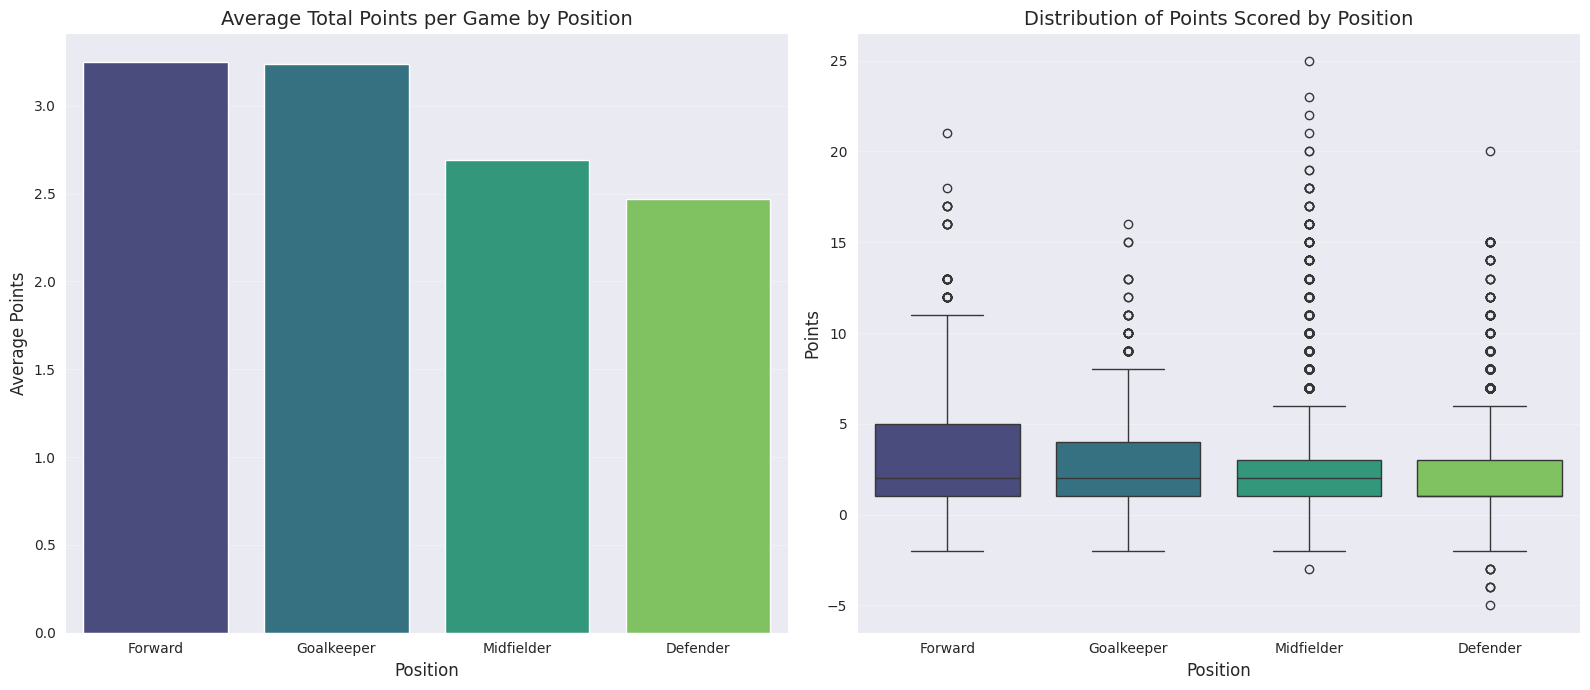

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Define Mapping and Create Column
# Detailed mapping of specific positions to general categories
position_mapping = {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'WB': 'Defender',
    'CM': 'Midfielder',
    'DM': 'Midfielder',
    'AM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'LW': 'Midfielder',
    'RW': 'Midfielder',
    'FW': 'Forward'
}

# Clean and map the positions
df['position_clean'] = df['meta_Pos'].fillna('Unknown').apply(
    lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown'
)
df['general_position'] = df['position_clean'].map(position_mapping)

# 2. Filter Data
# Keep only the 4 main positions for this specific analysis
valid_positions = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
plot_df = df[df['general_position'].isin(valid_positions)].copy()

# 3. Calculate Statistics
position_stats = plot_df.groupby('general_position').agg({
    'target_total_points': 'mean',
    'feature_goals_scored_last_1000_days': 'sum',
    'feature_assists_last_1000_days': 'sum',
    'target_minutes': 'mean',
    'meta_name': 'count'  # Track count of players
}).round(2)

position_stats.columns = [
    'Avg Total Points',
    'Total Goals',
    'Total Assists',
    'Avg Minutes',
    'Player Count'
]

# Sort by Average Total Points
position_stats = position_stats.sort_values('Avg Total Points', ascending=False)

# Display the summary table
print("Summary Statistics by General Position:")
display(position_stats)

# 4. Visualizations
plt.figure(figsize=(16, 7))

# Subplot 1: Bar Chart for Average Points
plt.subplot(1, 2, 1)
sns.barplot(x=position_stats.index, y=position_stats['Avg Total Points'], palette='viridis')
plt.title('Average Total Points per Game by Position', fontsize=14)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Average Points', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Box Plot for Points Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=plot_df, x='general_position', y='target_total_points',
            order=position_stats.index, palette='viridis')
plt.title('Distribution of Points Scored by Position', fontsize=14)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Task
Perform exploratory data analysis on the dataset located at "/content/final_dataset.csv". List all column names, display summary information and descriptive statistics. Visualize the distribution of `target_bps` using a histogram with KDE, and plot a correlation heatmap for numerical features. Finally, summarize the findings.

## List Column Names

### Subtask:
Extract and display the list of all column names in the dataframe to identify available variables.


**Reasoning**:
I will access the `columns` attribute of the DataFrame `df` and print the list of column names to the output to identify the available variables in the dataset.



In [ ]:
# Access and print the column names of the dataframe
print(df.columns.tolist())

['Unnamed: 0', 'meta_fixture_event', 'meta_fixture_team_a', 'meta_fixture_finished_provisional', 'meta_name', 'meta_merger_col', 'target_bps', 'meta_fixture_provisional_start_time', 'meta_match-name', 'meta_fixture_minutes', 'meta_fixture_team_h_score', 'meta_position', 'meta_fixture', 'meta_fixture_team_a_score', 'meta_fixture_code', 'meta_fixture_team_h_difficulty', 'target_bonus', 'meta_fixture_kickoff_time', 'meta_fixture_finished', 'target_minutes', 'target_total_points', 'meta_fixture_id', 'meta_fixture_pulse_id', 'meta_fixture_team_a_difficulty', 'meta_fixture_started', 'meta_fixture_team_h', 'meta_fixture_stats', 'meta_Age', 'meta_mapping_name', 'meta_Nation', 'meta_Pos', 'meta_Away', 'feature_saves_last_1000_days', 'feature_influence_last_1000_days', 'feature_yellow_cards_last_1000_days', 'feature_was_home_last_1000_days', 'feature_GW_last_1000_days', 'feature_red_cards_last_1000_days', 'feature_transfers_out_last_1000_days', 'feature_penalties_saved_last_1000_days', 'feature_

## Data Summary and Info

### Subtask:
Display the dataframe's summary information and descriptive statistics to understand data quality and distribution.


**Reasoning**:
I will use the `info()` method to display the summary information of the dataframe and the `describe()` method to show the descriptive statistics, which will help in understanding the data quality and distribution.



In [ ]:
# Display summary information of the dataframe
print("Dataframe Info:")
df.info()

# Display descriptive statistics of the dataframe
print("\nDescriptive Statistics:")
display(df.describe())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Columns: 170 entries, Unnamed: 0 to feature_minutes_last_1000_days
dtypes: bool(4), float64(138), int64(15), object(13)
memory usage: 35.1+ MB

Descriptive Statistics:


Unnamed: 0  meta_fixture_event    target_bps  meta_fixture_minutes  \
count  27605.000000        27605.000000  27605.000000               27605.0   
mean   13802.000000           20.378337      4.693498                  90.0   
std     7969.021427           10.911864      9.297526                   0.0   
min        0.000000            1.000000    -25.000000                  90.0   
25%     6901.000000           11.000000      0.000000                  90.0   
50%    13802.000000           21.000000      0.000000                  90.0   
75%    20703.000000           30.000000      6.000000                  90.0   
max    27604.000000           38.000000     97.000000                  90.0   

       meta_fixture_team_h_score  meta_fixture  meta_fixture_team_a_score  \
count               27605.000000  27605.000000               27605.000000   
mean                    1.522152    199.153921                   1.421916   
std                     1.282224    109.260217                   1.191170   
min                     0.000000      1.000000                   0.000000   
25%                     1.000000    106.000000                   1.000000   
50%                     1.000000    204.000000                   1.000000   
75%                     2.000000    294.000000                   2.000000   
max                     7.000000    380.000000                   6.000000   

       meta_fixture_code  meta_fixture_team_h_difficulty  target_bonus  ...  \
count       2.760500e+04                    27605.000000  27605.000000  ...   
mean        2.444668e+06                        2.932911      0.086977  ...   
std         1.092602e+02                        1.063615      0.441891  ...   
min         2.444470e+06                        1.000000      0.000000  ...   
25%         2.444575e+06                        2.000000      0.000000  ...   
50%         2.444673e+06                        3.000000      0.000000  ...   
75%         2.444763e+06                        3.000000      0.000000  ...   
max         2.444849e+06                        5.000000      3.000000  ...   

       feature_Tackles_Tkl_last_1000_days  \
count                        27605.000000   
mean                             0.059319   
std                              0.186647   
min                              0.000000   
25%                              0.000000   
50%                              0.000003   
75%                              0.046164   
max                              5.458776   

       feature_Performance_Touches_last_1000_days  \
count                                27605.000000   
mean                                     1.962619   
std                                      4.573827   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.072169   
75%                                      2.144106   
max                                     73.856867   

       feature_Receiving_PrgR_last_1000_days  \
count                           27605.000000   
mean                                0.119392   
std                                 0.393257   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.067836   
max                                15.623568   

       feature_Challenges_Tkl_last_1000_days  \
count                           27605.000000   
mean                                0.027687   
std                                 0.103161   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.015521   
max                                 3.398408   

       feature_Short_Cmp%_last_1000_days  \
count                       27605.000000   
mean                            4.251853   
std      

# Task
Fix the `multivariate_analysis` function in cell `QhB_6X4RRZD_` by passing the actual column names (`key_features`) to the `dimensions` parameter of `px.scatter_matrix` and using a dictionary mapping these columns to shortened names for the `labels` parameter to resolve the `ValueError`.

## Fix Multivariate Analysis

### Subtask:
Redefine the `multivariate_analysis` function to fix the ValueError by correctly mapping column names.


## Summary:

### Data Analysis Key Findings
*   The `ValueError` previously preventing the generation of the multivariate analysis was successfully resolved.
*   The issue was rectified by correctly assigning the actual column names (`key_features`) to the `dimensions` parameter of the scatter matrix function.
*   A dictionary mapping was implemented for the `labels` parameter, ensuring that column names are correctly associated with their display labels, allowing the visualization to render without parameter mismatch errors.

### Insights or Next Steps
*   With the scatter matrix generation fixed, the next step is to visually inspect the plots for non-linear relationships and potential outliers that summary statistics might miss.
*   Review the interaction between features to identify any strong multicollinearity that could impact model performance.


# Task
Create a new column `general_position` in the dataframe `df` (loaded from "/content/final_dataset.csv") by mapping the detailed position values (clean `meta_Pos` to get `position_clean` if needed) to four categories: 'Goalkeeper' (GK), 'Defender' (CB, LB, RB, WB), 'Midfielder' (CM, DM, AM, LM, RM, LW, RW), and 'Forward' (FW).

Then, group the data by `general_position` and calculate the following statistics:
1. Average `target_total_points`
2. Total `feature_goals_scored_last_1000_days`
3. Total `feature_assists_last_1000_days`
4. Average `target_minutes`

Display these statistics in a summary table.

Next, generate two visualizations:
1. A bar chart showing the Average Total Points per `general_position`.
2. A box plot showing the distribution of `target_total_points` for each `general_position`.

Finally, summarize the findings to identify which position group offers the highest average return.

## Map Positions

### Subtask:
Create a `general_position` column by categorizing detailed player positions into 'Goalkeeper', 'Defender', 'Midfielder', and 'Forward'.


**Reasoning**:
I will create the `position_clean` column by cleaning `meta_Pos`, define the mapping dictionary as specified, map the values to create `general_position`, and finally display the value counts to verify the mapping.



In [ ]:
# Create a temporary 'position_clean' column
df['position_clean'] = df['meta_Pos'].fillna('Unknown').apply(
    lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown'
)

# Define the mapping dictionary
position_mapping = {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'WB': 'Defender',
    'CM': 'Midfielder',
    'DM': 'Midfielder',
    'AM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'LW': 'Midfielder',
    'RW': 'Midfielder',
    'FW': 'Forward',
    'Unknown': 'Unknown'  # Ensure Unknowns are mapped
}

# Create the 'general_position' column
df['general_position'] = df['position_clean'].map(position_mapping)

# Display the value counts to verify
print(df['general_position'].value_counts(dropna=False))

general_position
Unknown       16814
Midfielder     5136
Defender       3706
Forward        1235
Goalkeeper      714
Name: count, dtype: int64


**Reasoning**:
I will group the dataframe by the newly created `general_position` column and calculate the mean of `target_total_points`, the sum of `feature_goals_scored_last_1000_days` and `feature_assists_last_1000_days`, and the mean of `target_minutes`. I will then verify the results by displaying the summary table.



In [ ]:
# Group by 'general_position' and calculate the required statistics
position_stats = df.groupby('general_position').agg({
    'target_total_points': 'mean',
    'feature_goals_scored_last_1000_days': 'sum',
    'feature_assists_last_1000_days': 'sum',
    'target_minutes': 'mean'
}).round(2)

# Rename columns for better readability
position_stats.columns = [
    'Avg Total Points',
    'Total Goals',
    'Total Assists',
    'Avg Minutes'
]

# Sort by Avg Total Points for better visualization of the table
position_stats = position_stats.sort_values('Avg Total Points', ascending=False)

# Display the summary table
display(position_stats)

Avg Total Points  Total Goals  Total Assists  Avg Minutes
general_position                                                           
Forward                       3.25        38.64          15.20        55.25
Goalkeeper                    3.24         0.00           0.57        88.78
Midfielder                    2.69        64.17          65.21        57.63
Defender                      2.47        12.46          19.15        73.74
Unknown                       0.23        16.45          16.87         2.83

**Reasoning**:
I will use matplotlib and seaborn to create the requested visualizations. First, a bar chart to visualize the average total points per general position using the `position_stats` dataframe. Second, a box plot to show the distribution of total points for each position using the main `df` dataframe. I will use the order from the sorted `position_stats` to ensure consistency between the plots.



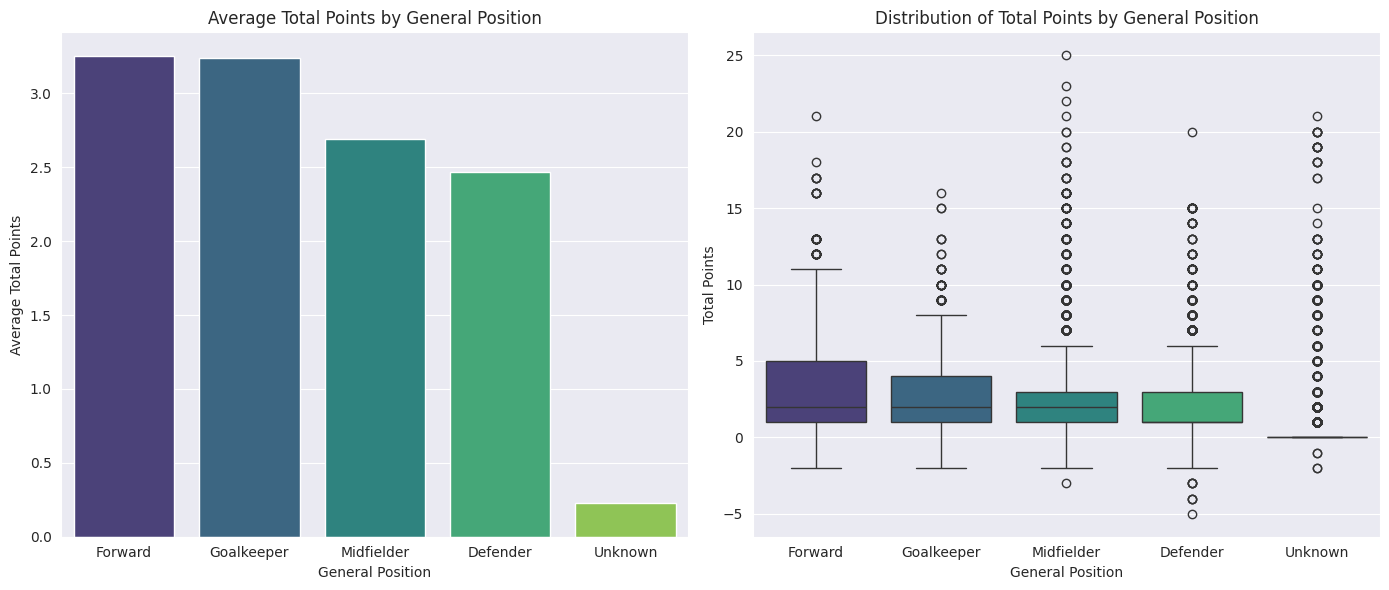

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# 1. Bar Chart: Average Total Points per General Position
plt.subplot(1, 2, 1)
sns.barplot(x=position_stats.index, y=position_stats['Avg Total Points'], palette='viridis')
plt.title('Average Total Points by General Position')
plt.xlabel('General Position')
plt.ylabel('Average Total Points')

# 2. Box Plot: Distribution of Total Points per General Position
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='general_position', y='target_total_points', order=position_stats.index, palette='viridis')
plt.title('Distribution of Total Points by General Position')
plt.xlabel('General Position')
plt.ylabel('Total Points')

plt.tight_layout()
plt.show()

## Summary of Findings

Based on the analysis of general positions:

*   **Highest Average Return:** **Forwards** offer the highest average return with **3.25 points** per game, making them a premium asset class.
*   **Consistent Performers:** **Goalkeepers** follow very closely with **3.24 points** on average. Their high average minutes (88.78) suggest they are reliable starters.
*   **Volume vs. Average:** While **Midfielders** have a lower average score (2.69 points), they contribute the highest total volume of goals (64.17) and assists (65.21), indicating a mix of high performers and rotation players.
*   **Defenders:** This group has the lowest average among known positions (2.47 points) but maintains a high average for minutes played (73.74).

## Summary:

### Q&A
**Which position group offers the highest average return?**
Based on the analysis, **Forwards** offer the highest average return with an average of **3.25** total points per entry.

### Data Analysis Key Findings
*   **Forwards** demonstrate the highest individual productivity with an average of **3.25** points.
*   **Goalkeepers** show high reliability, averaging **3.24** points and recording the highest average playing time at **88.78** minutes.
*   **Midfielders**, while having a lower average score of **2.69**, contributed the highest aggregate volume of attacking returns (Total Goals: **64.17**, Total Assists: **65.21**).
*   **Defenders** had the lowest average points among known positions at **2.47**.
*   The dataset contains a substantial number of entries categorized as 'Unknown' (16,814), which significantly outnumbers the mapped positions (Midfielders: 5,136, Defenders: 3,706, Forwards: 1,235, Goalkeepers: 714).

### Insights or Next Steps
*   **Strategic Selection:** Forwards offer the best potential for high points, but Goalkeepers provide the most consistent minutes, making them stable assets.
*   **Data Quality Check:** The large volume of 'Unknown' positions suggests a need for further data cleaning or investigation to ensure valuable player data is not being excluded from position-specific analysis.


In [ ]:
"""
Fantasy Premier League (FPL) - Complete Exploratory Data Analysis
==================================================================
A comprehensive EDA with beautiful visualizations using plotly, seaborn, and matplotlib
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

# ============================================================================
# 1. LOAD DATA
# ============================================================================

def load_data(filepath):
    """Load the FPL dataset"""
    print("Loading data...")
    df = pd.read_csv(filepath)
    print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    return df

# ============================================================================
# 2. DATA OVERVIEW
# ============================================================================

def data_overview(df):
    """Print comprehensive data overview"""
    print("\n" + "="*80)
    print("DATA OVERVIEW")
    print("="*80)

    print(f"\nDataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print("\n--- Target Variable Statistics ---")
    print(df['target_total_points'].describe())

    print("\n--- Missing Values (Top 20) ---")
    missing = df.isnull().sum().sort_values(ascending=False).head(20)
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
    print(missing_df)

    print("\n--- Data Types ---")
    print(df.dtypes.value_counts())

    return df

# ============================================================================
# 3. TARGET VARIABLE ANALYSIS
# ============================================================================

def analyze_target_variable(df):
    """Analyze target_total_points distribution"""
    print("\n" + "="*80)
    print("TARGET VARIABLE ANALYSIS")
    print("="*80)

    target = df['target_total_points'].dropna()

    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Points Distribution', 'Box Plot',
                       'Cumulative Distribution', 'Density Plot'),
        specs=[[{'type': 'bar'}, {'type': 'box'}],
               [{'type': 'scatter'}, {'type': 'scatter'}]]
    )

    # Histogram
    fig.add_trace(
        go.Histogram(x=target, nbinsx=50, name='Points',
                    marker_color='rgb(99, 110, 250)'),
        row=1, col=1
    )

    # Box plot
    fig.add_trace(
        go.Box(y=target, name='Points', marker_color='rgb(239, 85, 59)'),
        row=1, col=2
    )

    # Cumulative distribution
    sorted_target = np.sort(target)
    cumulative = np.arange(1, len(sorted_target) + 1) / len(sorted_target)
    fig.add_trace(
        go.Scatter(x=sorted_target, y=cumulative, mode='lines',
                  name='CDF', line=dict(color='rgb(0, 204, 150)', width=3)),
        row=2, col=1
    )

    # Density plot (KDE approximation)
    from scipy import stats
    density = stats.gaussian_kde(target)
    xs = np.linspace(target.min(), target.max(), 200)
    fig.add_trace(
        go.Scatter(x=xs, y=density(xs), mode='lines', fill='tozeroy',
                  name='Density', line=dict(color='rgb(171, 99, 250)', width=2)),
        row=2, col=2
    )

    fig.update_layout(height=800, showlegend=False,
                     title_text="Target Variable (total_points) - Comprehensive Analysis",
                     title_font_size=20)
    fig.show()

    # Statistics
    print(f"\nMean: {target.mean():.2f}")
    print(f"Median: {target.median():.2f}")
    print(f"Std Dev: {target.std():.2f}")
    print(f"Skewness: {target.skew():.2f}")
    print(f"Kurtosis: {target.kurtosis():.2f}")
    print(f"Min: {target.min():.2f}, Max: {target.max():.2f}")

# ============================================================================
# 4. POSITION-BASED ANALYSIS
# ============================================================================

def analyze_by_position(df):
    """Analyze performance by player position"""
    print("\n" + "="*80)
    print("POSITION-BASED ANALYSIS")
    print("="*80)

    # Clean position data
    df['position_clean'] = df['meta_Pos'].fillna('Unknown').apply(
        lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown'
    )

    # Aggregate by position
    pos_stats = df.groupby('position_clean').agg({
        'target_total_points': ['mean', 'median', 'std', 'count'],
        'target_minutes': 'mean',
        'target_bonus': 'mean',
        'feature_goals_scored_last_1000_days': 'mean',
        'feature_assists_last_1000_days': 'mean'
    }).round(2)

    pos_stats.columns = ['_'.join(col) for col in pos_stats.columns]
    pos_stats = pos_stats.sort_values('target_total_points_mean', ascending=False)
    print("\n", pos_stats)

    # Visualizations
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Avg Points by Position', 'Points Distribution by Position',
                       'Avg Minutes by Position', 'Avg Bonus by Position')
    )

    # Average points
    fig.add_trace(
        go.Bar(x=pos_stats.index, y=pos_stats['target_total_points_mean'],
              marker_color='rgb(55, 83, 109)', name='Avg Points'),
        row=1, col=1
    )

    # Box plot by position
    for pos in df['position_clean'].unique():
        if pos != 'Unknown':
            pos_data = df[df['position_clean'] == pos]['target_total_points'].dropna()
            fig.add_trace(
                go.Box(y=pos_data, name=pos, boxmean='sd'),
                row=1, col=2
            )

    # Average minutes
    fig.add_trace(
        go.Bar(x=pos_stats.index, y=pos_stats['target_minutes_mean'],
              marker_color='rgb(26, 118, 255)', name='Avg Minutes'),
        row=2, col=1
    )

    # Average bonus
    fig.add_trace(
        go.Bar(x=pos_stats.index, y=pos_stats['target_bonus_mean'],
              marker_color='rgb(50, 171, 96)', name='Avg Bonus'),
        row=2, col=2
    )

    fig.update_layout(height=900, showlegend=False,
                     title_text="Position-Based Performance Analysis",
                     title_font_size=20)
    fig.show()

# ============================================================================
# 5. TOP PERFORMERS ANALYSIS
# ============================================================================

def analyze_top_performers(df, top_n=20):
    """Identify and analyze top performing players"""
    print("\n" + "="*80)
    print(f"TOP {top_n} PERFORMERS ANALYSIS")
    print("="*80)

    # Calculate per-player statistics
    player_stats = df.groupby('meta_name').agg({
        'target_total_points': ['sum', 'mean', 'count'],
        'target_minutes': 'sum',
        'feature_goals_scored_last_1000_days': 'sum',
        'feature_assists_last_1000_days': 'sum',
        'meta_Pos': 'first'
    }).round(2)

    player_stats.columns = ['total_points', 'avg_points', 'games',
                           'total_minutes', 'goals', 'assists', 'position']
    player_stats = player_stats[player_stats['games'] >= 5]  # Minimum 5 games
    player_stats = player_stats.sort_values('avg_points', ascending=False).head(top_n)

    print("\n", player_stats)

    # Visualization
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(f'Top {top_n} Players by Avg Points',
                       f'Top {top_n} Players by Total Points')
    )

    # Top by average
    fig.add_trace(
        go.Bar(y=player_stats.index, x=player_stats['avg_points'],
              orientation='h', marker_color='rgb(158, 202, 225)',
              text=player_stats['avg_points'], textposition='outside'),
        row=1, col=1
    )

    # Top by total
    top_total = player_stats.sort_values('total_points', ascending=True).tail(top_n)
    fig.add_trace(
        go.Bar(y=top_total.index, x=top_total['total_points'],
              orientation='h', marker_color='rgb(107, 174, 214)',
              text=top_total['total_points'], textposition='outside'),
        row=1, col=2
    )

    fig.update_layout(height=800, showlegend=False,
                     title_text="Top Performers Analysis",
                     title_font_size=20)
    fig.update_xaxes(title_text="Average Points", row=1, col=1)
    fig.update_xaxes(title_text="Total Points", row=1, col=2)
    fig.show()

# ============================================================================
# 6. FEATURE CORRELATION ANALYSIS
# ============================================================================

def correlation_analysis(df):
    """Analyze correlations between features and target"""
    print("\n" + "="*80)
    print("FEATURE CORRELATION ANALYSIS")
    print("="*80)

    # Select relevant features
    feature_cols = [col for col in df.columns if col.startswith('feature_') and
                   df[col].dtype in ['float64', 'int64']]

    # Calculate correlations with target
    correlations = df[feature_cols + ['target_total_points']].corr()['target_total_points'].drop('target_total_points')
    correlations = correlations.sort_values(ascending=False)

    # Top positive and negative correlations
    top_corr = pd.concat([correlations.head(15), correlations.tail(15)])

    print("\nTop 15 Positive Correlations:")
    print(correlations.head(15))
    print("\nTop 15 Negative Correlations:")
    print(correlations.tail(15))

    # Visualization
    fig = go.Figure()

    colors = ['rgb(0, 204, 150)' if x > 0 else 'rgb(239, 85, 59)'
             for x in top_corr.values]

    fig.add_trace(go.Bar(
        y=[col.replace('feature_', '').replace('_last_1000_days', '')
           for col in top_corr.index],
        x=top_corr.values,
        orientation='h',
        marker_color=colors,
        text=top_corr.values.round(3),
        textposition='outside'
    ))

    fig.update_layout(
        title="Top Features Correlated with Total Points",
        title_font_size=20,
        xaxis_title="Correlation Coefficient",
        yaxis_title="Feature",
        height=800,
        showlegend=False
    )
    fig.show()

    # Correlation heatmap for top features
    top_features = correlations.abs().nlargest(20).index.tolist()
    corr_matrix = df[top_features + ['target_total_points']].corr()

    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=[col.replace('feature_', '').replace('_last_1000_days', '')[:20]
           for col in corr_matrix.columns],
        y=[col.replace('feature_', '').replace('_last_1000_days', '')[:20]
           for col in corr_matrix.index],
        colorscale='RdBu',
        zmid=0,
        text=corr_matrix.values.round(2),
        texttemplate='%{text}',
        textfont={"size": 8}
    ))

    fig.update_layout(
        title="Correlation Heatmap - Top 20 Features",
        title_font_size=20,
        height=900,
        width=1000
    )
    fig.show()

# ============================================================================
# 7. HOME VS AWAY ANALYSIS
# ============================================================================

def home_away_analysis(df):
    """Analyze home vs away performance"""
    print("\n" + "="*80)
    print("HOME VS AWAY ANALYSIS")
    print("="*80)

    # Create home/away indicator
    df['is_home'] = df['feature_was_home_last_1000_days'].apply(
        lambda x: 'Home' if x > 0.5 else 'Away' if x < 0.5 else 'Unknown'
    )

    # Compare statistics
    venue_stats = df.groupby('is_home').agg({
        'target_total_points': ['mean', 'median', 'std', 'count'],
        'target_minutes': 'mean',
        'feature_goals_scored_last_1000_days': 'mean',
        'feature_assists_last_1000_days': 'mean'
    }).round(2)

    print("\n", venue_stats)

    # Visualization
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Average Points by Venue', 'Points Distribution by Venue')
    )

    # Bar chart
    venue_means = df.groupby('is_home')['target_total_points'].mean()
    fig.add_trace(
        go.Bar(x=venue_means.index, y=venue_means.values,
              marker_color=['rgb(55, 83, 109)', 'rgb(26, 118, 255)'],
              text=venue_means.values.round(2), textposition='outside'),
        row=1, col=1
    )

    # Box plot
    for venue in ['Home', 'Away']:
        venue_data = df[df['is_home'] == venue]['target_total_points'].dropna()
        fig.add_trace(
            go.Box(y=venue_data, name=venue, boxmean='sd'),
            row=1, col=2
        )

    fig.update_layout(height=500, showlegend=True,
                     title_text="Home vs Away Performance Comparison",
                     title_font_size=20)
    fig.show()

# ============================================================================
# 8. MINUTES VS POINTS ANALYSIS
# ============================================================================

def minutes_vs_points_analysis(df):
    """Analyze relationship between minutes played and points"""
    print("\n" + "="*80)
    print("MINUTES VS POINTS ANALYSIS")
    print("="*80)

    # Sample for visualization
    sample = df[['target_minutes', 'target_total_points', 'meta_Pos']].dropna().sample(
        min(5000, len(df)), random_state=42
    )
    sample['position_clean'] = sample['meta_Pos'].apply(
        lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown'
    )

    # Scatter plot with trend line
    fig = px.scatter(sample, x='target_minutes', y='target_total_points',
                    color='position_clean', opacity=0.6,
                    title='Minutes Played vs Points Scored (by Position)',
                    labels={'target_minutes': 'Minutes Played',
                           'target_total_points': 'Total Points',
                           'position_clean': 'Position'},
                    trendline='ols', trendline_scope='overall')

    fig.update_layout(height=700, title_font_size=20)
    fig.show()

    # Binned analysis
    df['minutes_bin'] = pd.cut(df['target_minutes'], bins=10)
    binned_stats = df.groupby('minutes_bin')['target_total_points'].agg(['mean', 'count'])
    print("\nPoints by Minutes Played (Binned):")
    print(binned_stats)

# ============================================================================
# 9. EXPECTED VS ACTUAL PERFORMANCE
# ============================================================================

def expected_vs_actual_analysis(df):
    """Compare expected points (xP) with actual points"""
    print("\n" + "="*80)
    print("EXPECTED VS ACTUAL PERFORMANCE")
    print("="*80)

    # Filter valid data
    valid_data = df[['feature_xP_last_1000_days', 'target_total_points',
                     'meta_name']].dropna()

    # Calculate over/under performance
    valid_data['performance_diff'] = (valid_data['target_total_points'] -
                                     valid_data['feature_xP_last_1000_days'])

    # Top over/underperformers
    player_perf = valid_data.groupby('meta_name').agg({
        'feature_xP_last_1000_days': 'mean',
        'target_total_points': 'mean',
        'performance_diff': 'mean'
    }).round(2)

    print("\nTop 10 Overperformers:")
    print(player_perf.nlargest(10, 'performance_diff'))
    print("\nTop 10 Underperformers:")
    print(player_perf.nsmallest(10, 'performance_diff'))

    # Scatter plot
    sample = valid_data.sample(min(2000, len(valid_data)), random_state=42)

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=sample['feature_xP_last_1000_days'],
        y=sample['target_total_points'],
        mode='markers',
        marker=dict(size=5, opacity=0.6, color='rgb(99, 110, 250)'),
        name='Actual vs Expected'
    ))

    # Add diagonal line (perfect prediction)
    max_val = max(sample['feature_xP_last_1000_days'].max(),
                 sample['target_total_points'].max())
    fig.add_trace(go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        line=dict(color='red', dash='dash', width=2),
        name='Perfect Prediction'
    ))

    fig.update_layout(
        title='Expected Points vs Actual Points',
        title_font_size=20,
        xaxis_title='Expected Points (xP)',
        yaxis_title='Actual Points',
        height=700
    )
    fig.show()

# ============================================================================
# 10. ADVANCED METRICS ANALYSIS
# ============================================================================

def advanced_metrics_analysis(df):
    """Analyze advanced FPL and football metrics"""
    print("\n" + "="*80)
    print("ADVANCED METRICS ANALYSIS")
    print("="*80)

    # ICT Index components
    ict_cols = ['feature_influence_last_1000_days',
                'feature_creativity_last_1000_days',
                'feature_threat_last_1000_days',
                'feature_ict_index_last_1000_days']

    ict_data = df[ict_cols + ['target_total_points', 'meta_name']].dropna()

    # Player averages
    player_ict = ict_data.groupby('meta_name').mean().round(2)
    top_players = player_ict.nlargest(15, 'feature_ict_index_last_1000_days')

    # Radar chart for top players
    categories = ['Influence', 'Creativity', 'Threat', 'ICT Index']

    fig = go.Figure()

    for i, player in enumerate(top_players.head(5).index):
        values = [
            top_players.loc[player, 'feature_influence_last_1000_days'],
            top_players.loc[player, 'feature_creativity_last_1000_days'],
            top_players.loc[player, 'feature_threat_last_1000_days'],
            top_players.loc[player, 'feature_ict_index_last_1000_days']
        ]

        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=player
        ))

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True)),
        title='Top 5 Players - ICT Components Comparison',
        title_font_size=20,
        height=700
    )
    fig.show()

    # Expected goals and assists
    fig = make_subplots(rows=1, cols=2,
                       subplot_titles=('xG vs Actual Goals', 'xA vs Actual Assists'))

    goals_data = df[['feature_expected_goals_last_1000_days',
                    'feature_goals_scored_last_1000_days']].dropna().sample(
                        min(1000, len(df)), random_state=42)

    fig.add_trace(
        go.Scatter(x=goals_data['feature_expected_goals_last_1000_days'],
                  y=goals_data['feature_goals_scored_last_1000_days'],
                  mode='markers', marker=dict(size=5, opacity=0.6),
                  name='Goals'),
        row=1, col=1
    )

    assists_data = df[['feature_expected_assists_last_1000_days',
                      'feature_assists_last_1000_days']].dropna().sample(
                          min(1000, len(df)), random_state=42)

    fig.add_trace(
        go.Scatter(x=assists_data['feature_expected_assists_last_1000_days'],
                  y=assists_data['feature_assists_last_1000_days'],
                  mode='markers', marker=dict(size=5, opacity=0.6, color='orange'),
                  name='Assists'),
        row=1, col=2
    )

    fig.update_layout(height=500, showlegend=True,
                     title_text="Expected vs Actual: Goals and Assists",
                     title_font_size=20)
    fig.show()

# ============================================================================
# 11. TIME-BASED ANALYSIS
# ============================================================================

def time_based_analysis(df):
    """Analyze performance trends over time"""
    print("\n" + "="*80)
    print("TIME-BASED ANALYSIS")
    print("="*80)

    if 'feature_GW_last_1000_days' in df.columns:
        # Points by gameweek
        gw_stats = df.groupby('feature_GW_last_1000_days').agg({
            'target_total_points': ['mean', 'sum', 'count']
        }).round(2)

        gw_stats.columns = ['avg_points', 'total_points', 'num_players']
        gw_stats = gw_stats.sort_index()

        fig = make_subplots(rows=2, cols=1,
                           subplot_titles=('Average Points per Gameweek',
                                         'Total Points Distribution by Gameweek'))

        fig.add_trace(
            go.Scatter(x=gw_stats.index, y=gw_stats['avg_points'],
                      mode='lines+markers', line=dict(width=3),
                      marker=dict(size=8), name='Avg Points'),
            row=1, col=1
        )

        fig.add_trace(
            go.Bar(x=gw_stats.index, y=gw_stats['total_points'],
                  name='Total Points', marker_color='rgb(158, 202, 225)'),
            row=2, col=1
        )

        fig.update_layout(height=800, showlegend=True,
                         title_text="Performance Trends by Gameweek",
                         title_font_size=20)
        fig.show()

# ============================================================================
# 12. MULTIVARIATE ANALYSIS
# ============================================================================

def multivariate_analysis(df):
    """Analyze relationships between multiple variables"""
    print("\n" + "="*80)
    print("MULTIVARIATE ANALYSIS")
    print("="*80)

    # Select key features
    key_features = [
        'feature_goals_scored_last_1000_days',
        'feature_assists_last_1000_days',
        'feature_ict_index_last_1000_days',
        'feature_expected_goals_last_1000_days',
        'feature_expected_assists_last_1000_days',
        'target_total_points',
        'target_minutes'
    ]

    # Pairplot data
    plot_data = df[key_features].dropna().sample(min(1000, len(df)), random_state=42)

    # Create labels dictionary for prettier display
    labels = {col: col.replace('feature_', '').replace('_last_1000_days', '')[:15]
              for col in key_features}

    # Create scatter matrix
    fig = px.scatter_matrix(
        plot_data,
        dimensions=key_features,
        labels=labels,
        title='Scatter Matrix - Key Performance Metrics',
        height=1000,
        width=1000
    )

    fig.update_traces(diagonal_visible=False, showupperhalf=False)
    fig.update_layout(title_font_size=20)
    fig.show()

# ============================================================================
# 13. BONUS POINTS ANALYSIS
# ============================================================================

def bonus_analysis(df):
    """Analyze bonus points distribution and factors"""
    print("\n" + "="*80)
    print("BONUS POINTS ANALYSIS")
    print("="*80)

    bonus_data = df[['target_bonus', 'target_bps', 'target_total_points',
                    'meta_Pos']].dropna()

    print(f"\nPlayers receiving bonus: {(bonus_data['target_bonus'] > 0).sum()}")
    print(f"Percentage: {(bonus_data['target_bonus'] > 0).mean() * 100:.2f}%")

    # Bonus distribution
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Bonus Points Distribution', 'BPS vs Bonus Points')
    )

    fig.add_trace(
        go.Histogram(x=bonus_data['target_bonus'], nbinsx=20,
                    marker_color='rgb(99, 110, 250)'),
        row=1, col=1
    )

    sample = bonus_data.sample(min(2000, len(bonus_data)), random_state=42)
    fig.add_trace(
        go.Scatter(x=sample['target_bps'], y=sample['target_bonus'],
                  mode='markers', marker=dict(size=5, opacity=0.5)),
        row=1, col=2
    )

    fig.update_layout(height=500, showlegend=False,
                     title_text="Bonus Points Analysis",
                     title_font_size=20)
    fig.show()

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def run_complete_eda(filepath):
    """Run complete EDA pipeline"""
    print("="*80)
    print("FANTASY PREMIER LEAGUE - COMPREHENSIVE EDA")
    print("="*80)

    # Load data
    df = load_data(filepath)

    # Run all analyses
    data_overview(df)
    analyze_target_variable(df)
    analyze_by_position(df)
    analyze_top_performers(df, top_n=20)
    correlation_analysis(df)
    home_away_analysis(df)
    minutes_vs_points_analysis(df)
    expected_vs_actual_analysis(df)
    advanced_metrics_analysis(df)
    time_based_analysis(df)
    multivariate_analysis(df)
    bonus_analysis(df)

    print("\n" + "="*80)
    print("EDA COMPLETE!")
    print("="*80)

    return df

# ============================================================================
# RUN THE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    # Replace with your file path
    filepath = "/content/final_dataset.csv"

    # Run complete EDA
    df = run_complete_eda(filepath)

    print("\nAll visualizations have been generated!")
    print("Review the plots and statistics above for comprehensive insights.")

FANTASY PREMIER LEAGUE - COMPREHENSIVE EDA
Loading data...
Dataset loaded: 27605 rows, 170 columns

DATA OVERVIEW

Dataset Shape: (27605, 170)
Memory Usage: 101.62 MB

--- Target Variable Statistics ---
count    27605.000000
mean         1.200906
std          2.416882
min         -5.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         25.000000
Name: target_total_points, dtype: float64

--- Missing Values (Top 20) ---
                                     Missing_Count  Percentage
meta_Nation                                  16814       60.91
meta_Pos                                     16814       60.91
meta_Away                                    16814       60.91
meta_mapping_name                            16814       60.91
meta_Age                                     16814       60.91
meta_name                                        0        0.00
meta_fixture_team_a                              0        0.00
meta_fixture_finished_provisional         


Mean: 1.20
Median: 0.00
Std Dev: 2.42
Skewness: 3.10
Kurtosis: 11.78
Min: -5.00, Max: 25.00

POSITION-BASED ANALYSIS

                 target_total_points_mean  target_total_points_median  \
position_clean                                                         
RW                                  3.32                         2.0   
FW                                  3.25                         2.0   
GK                                  3.24                         2.0   
AM                                  3.11                         2.0   
LW                                  3.01                         2.0   
WB                                  2.75                         1.0   
LB                                  2.54                         1.0   
RM                                  2.53                         2.0   
LM                                  2.46                         1.0   
CB                                  2.42                         1.0   
RB              


TOP 20 PERFORMERS ANALYSIS

                                         total_points  avg_points  games  \
meta_name                                                                 
Mohamed Salah                                    344        9.05     38   
David Moyes                                      137        8.06     17   
Oliver Glasner                                   128        8.00     16   
Fabian Hürzeler                                  119        7.44     16   
Thomas Frank                                     116        7.25     16   
Pep Guardiola                                    113        7.06     16   
Vítor Manuel de Oliveira Lopes Pereira           111        6.94     16   
Arne Slot                                        118        6.94     17   
Unai Emery                                       105        6.56     16   
Mikel Arteta                                     104        6.50     16   
Bryan Mbeumo                                     236        6.21     3


FEATURE CORRELATION ANALYSIS

Top 15 Positive Correlations:
feature_xP_last_1000_days                            0.312566
feature_ict_index_last_1000_days                     0.299019
feature_minutes_last_1000_days                       0.283513
feature_starts_last_1000_days                        0.275952
feature_Min_last_1000_days                           0.274555
feature_influence_last_1000_days                     0.269043
feature_expected_goal_involvements_last_1000_days    0.257339
feature_SCA_SCA_last_1000_days                       0.254404
feature_Touches_Att 3rd_last_1000_days               0.254152
feature_Touches_Att Pen_last_1000_days               0.250792
feature_threat_last_1000_days                        0.250219
feature_selected_last_1000_days                      0.244997
feature_Performance_Sh_last_1000_days                0.244469
feature_creativity_last_1000_days                    0.243362
feature_Short_Cmp%_last_1000_days                    0.241866
Name: tar


HOME VS AWAY ANALYSIS

         target_total_points                     target_minutes  \
                       mean median   std  count           mean   
is_home                                                          
Away                   1.20    0.0  2.41  27225          27.10   
Home                   1.41    0.0  2.93    380          28.25   

        feature_goals_scored_last_1000_days feature_assists_last_1000_days  
                                       mean                           mean  
is_home                                                                     
Away                                   0.00                           0.00  
Home                                   0.02                           0.01  



MINUTES VS POINTS ANALYSIS



Points by Minutes Played (Binned):
                  mean  count
minutes_bin                  
(-0.09, 9.0]  0.174183  17051
(9.0, 18.0]   1.289100    844
(18.0, 27.0]  1.424855    692
(27.0, 36.0]  1.253165    395
(36.0, 45.0]  1.173410    519
(45.0, 54.0]  0.813333     75
(54.0, 63.0]  2.252427    515
(63.0, 72.0]  3.329700    734
(72.0, 81.0]  3.540313    831
(81.0, 90.0]  3.428475   5949

EXPECTED VS ACTUAL PERFORMANCE

Top 10 Overperformers:
                                        feature_xP_last_1000_days  \
meta_name                                                           
Mohamed Salah                                                1.26   
Oliver Glasner                                               1.01   
Fabian Hürzeler                                              0.94   
Thomas Frank                                                 0.90   
Vítor Manuel de Oliveira Lopes Pereira                       1.10   
Pep Guardiola                                                1.25


ADVANCED METRICS ANALYSIS



TIME-BASED ANALYSIS



MULTIVARIATE ANALYSIS



BONUS POINTS ANALYSIS

Players receiving bonus: 1114
Percentage: 10.32%



EDA COMPLETE!

All visualizations have been generated!
Review the plots and statistics above for comprehensive insights.


Shape: (9240, 171)

Head:
   meta_fixture_event meta_fixture_team_a  meta_fixture_finished_provisional          meta_name                                   meta_merger_col  target_bps  meta_fixture_provisional_start_time  \
0                   1         Bournemouth                               True         Alex Scott       Alex Scott---Nott'ham Forest vs Bournemouth          11                                False   
4                   1         Southampton                               True  Ben Brereton Díaz  Ben Brereton Díaz---Newcastle Utd vs Southampton          -2                                False   
5                   1         Aston Villa                               True         Pau Torres              Pau Torres---West Ham vs Aston Villa          17                                False   
13                  1     Manchester City                               True        Cole Palmer          Cole Palmer---Chelsea vs Manchester City          18                         

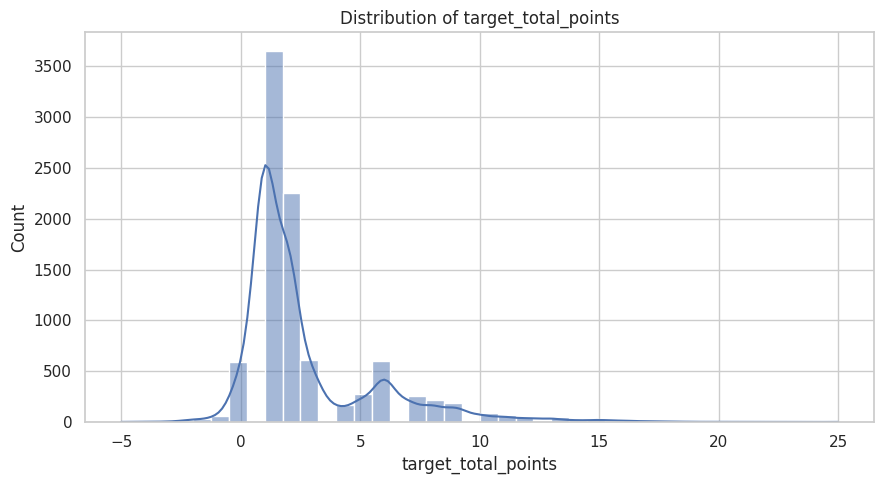

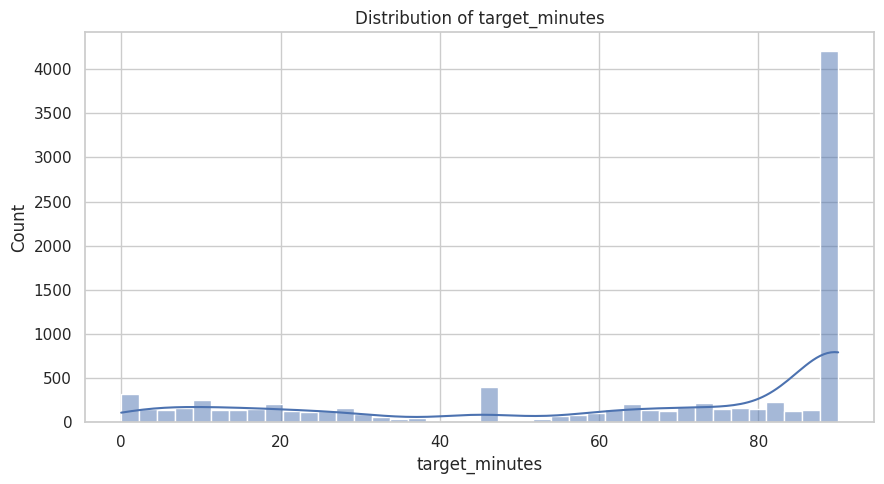

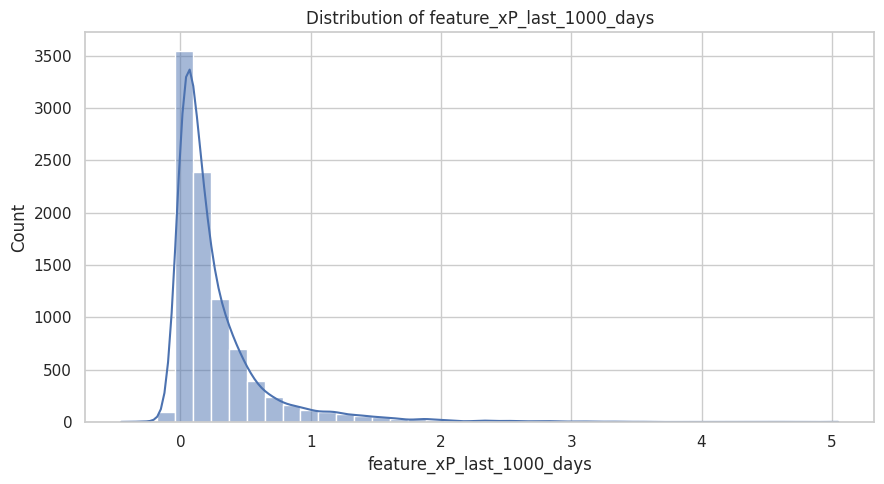

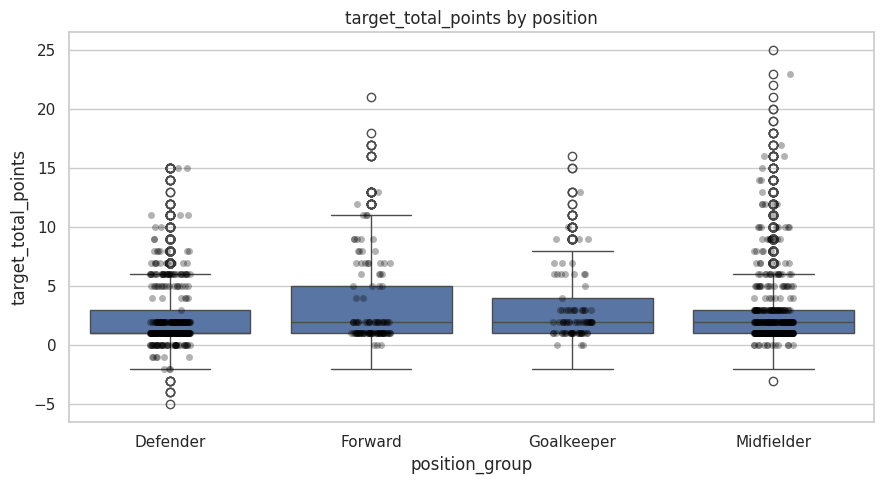

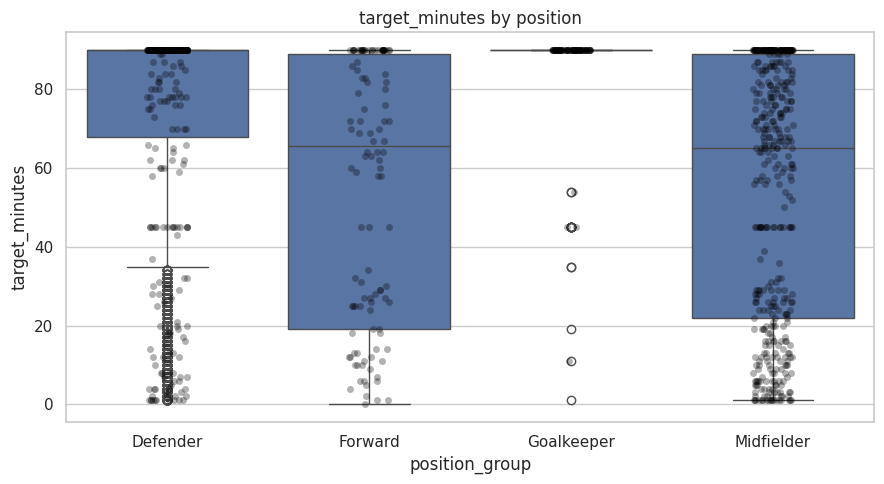

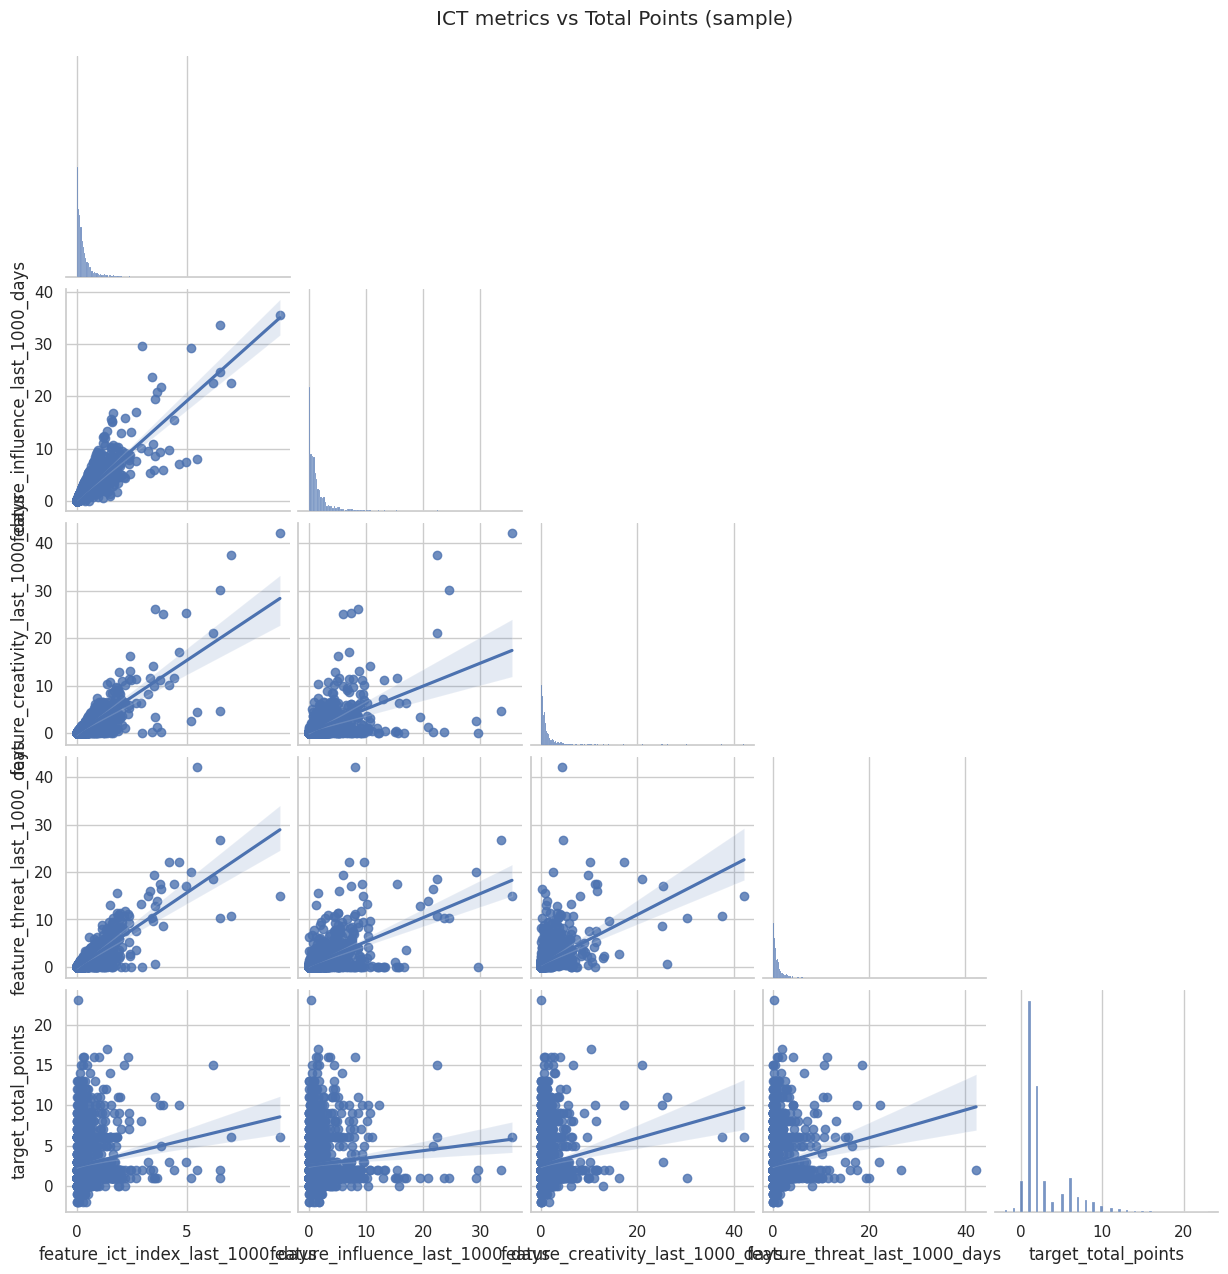

/tmp/ipython-input-707393300.py:260: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



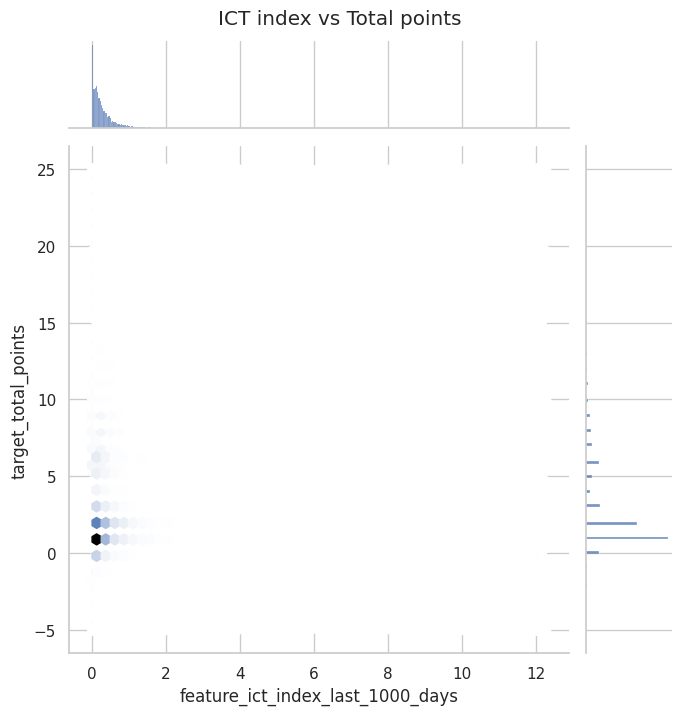

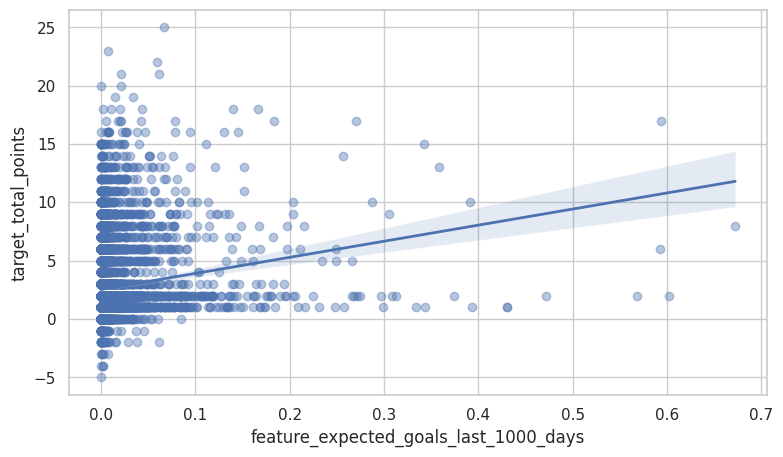

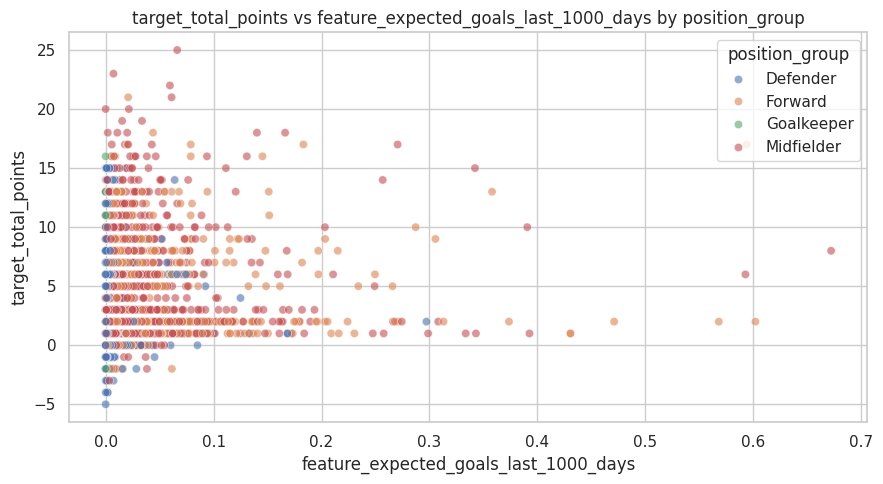

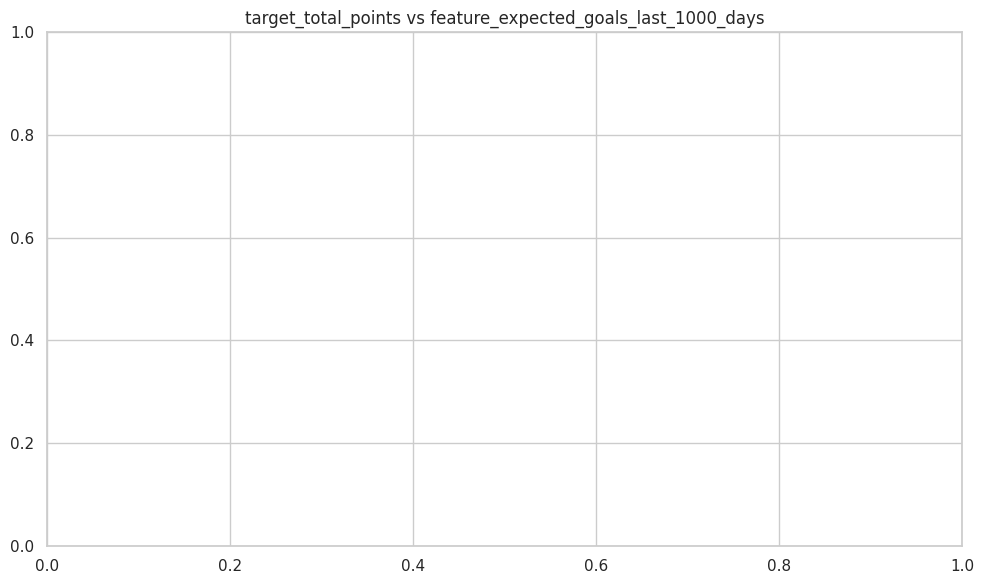

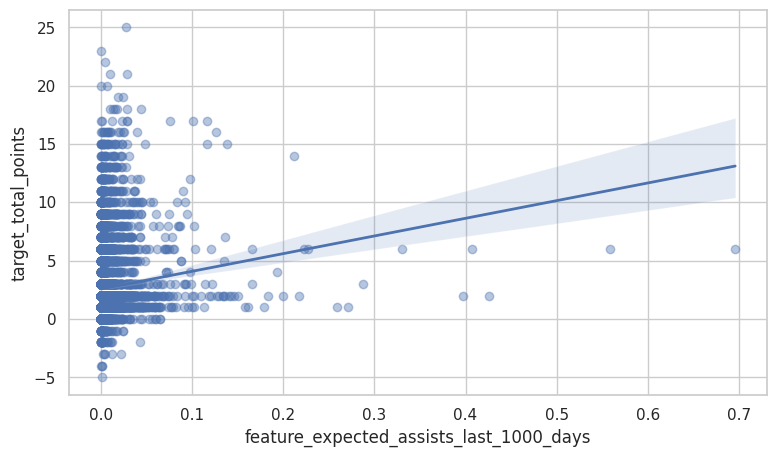

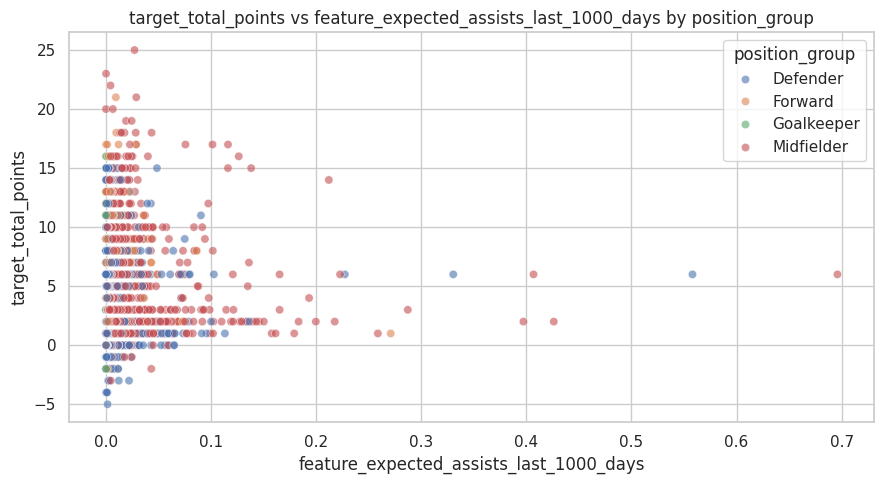

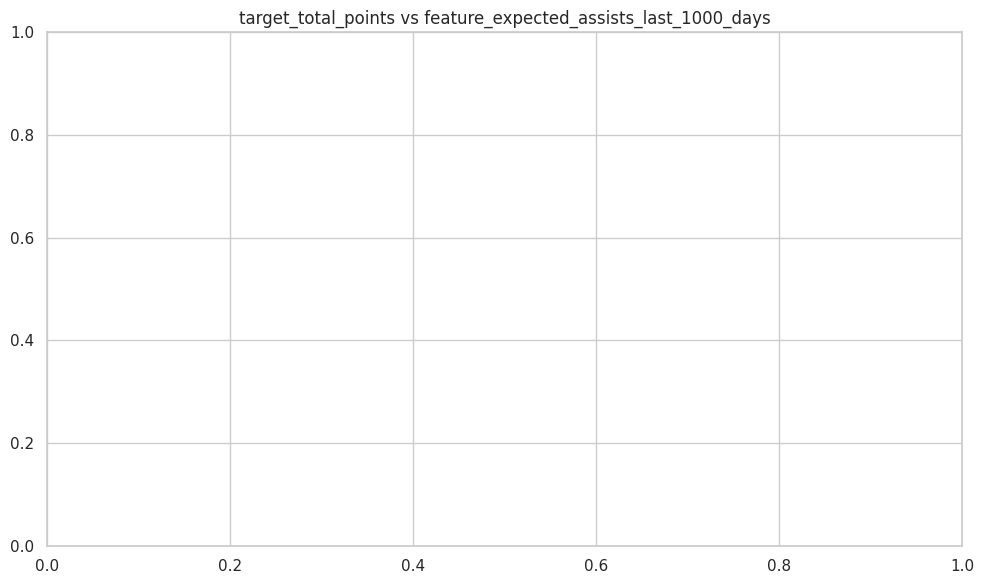

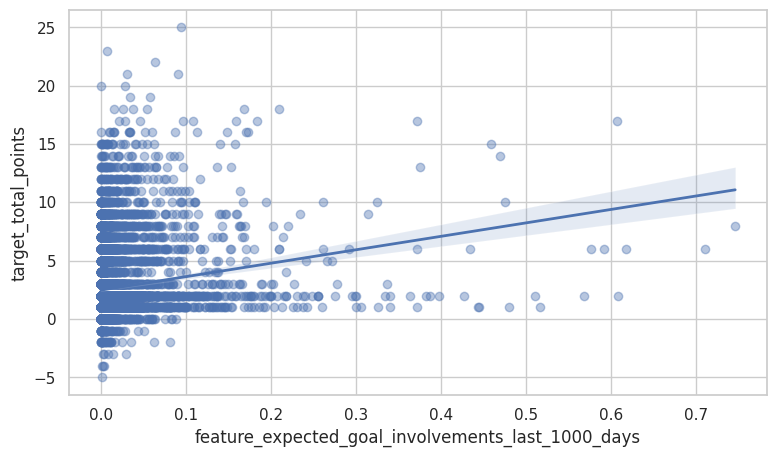

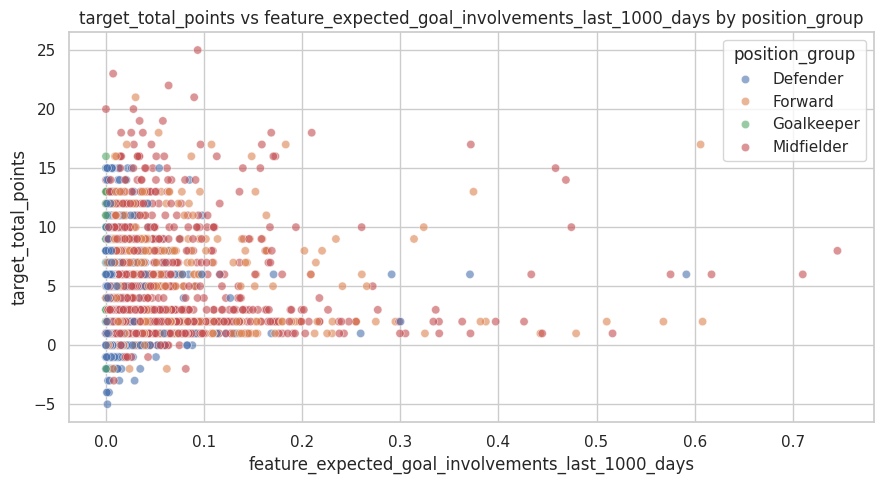

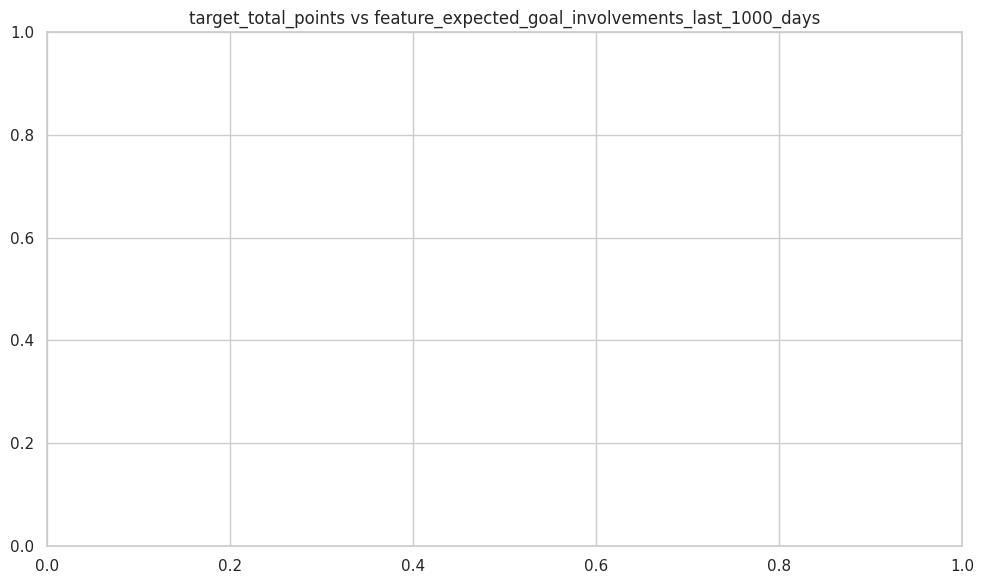

/tmp/ipython-input-707393300.py:404: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-707393300.py:423: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-707393300.py:452: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



PCA explained variance ratios: [0.46760474 0.13436807]


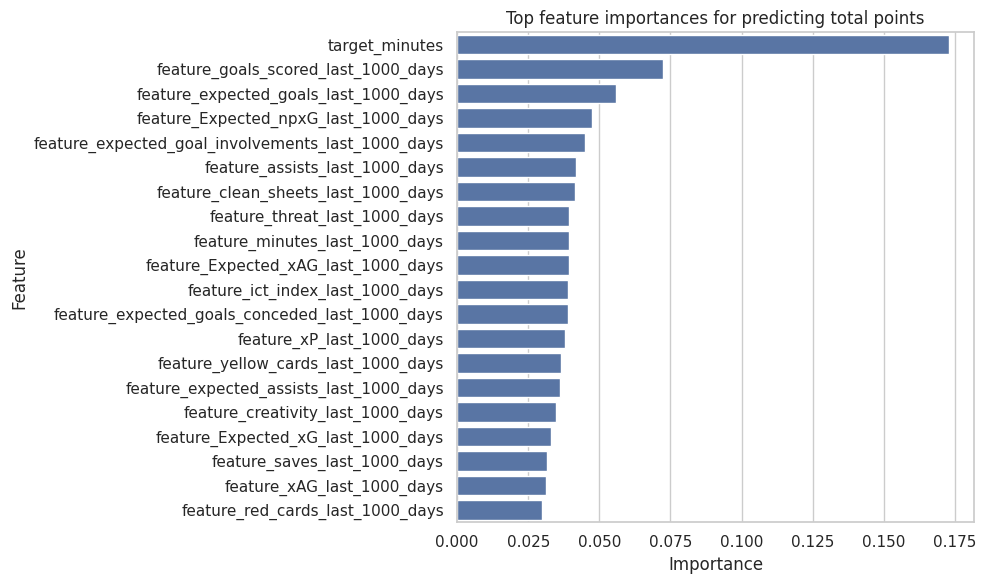

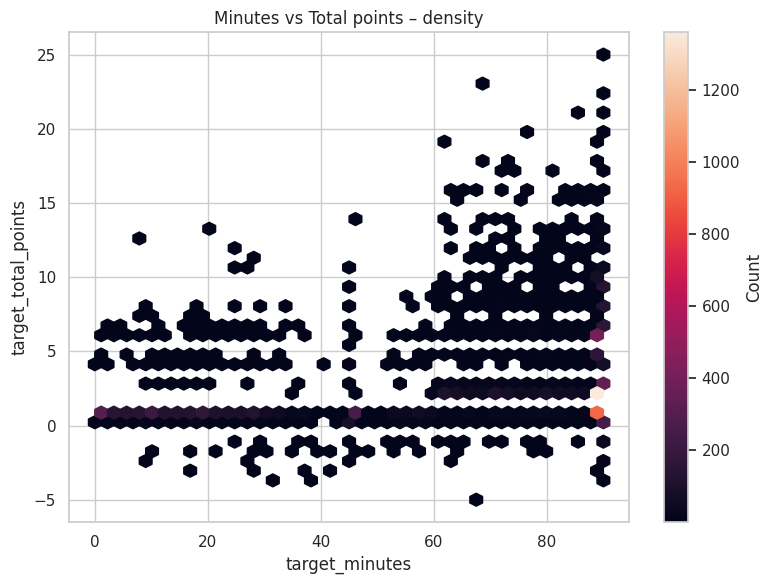

In [ ]:
# =============================================
# 0. Imports & Style
# =============================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# For feature importance
try:
    from xgboost import XGBRegressor
    HAS_XGBOOST = True
except ImportError:
    from sklearn.ensemble import RandomForestRegressor
    HAS_XGBOOST = False

plt.rcParams["figure.figsize"] = (10, 6)
sns.set_theme(style="whitegrid")

# For nicer pandas display
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


# =============================================
# 1. Basic Setup & Cleaning
# =============================================

# If you need to load:
# df = pd.read_csv("your_fpl_data.csv")

# 1.1 Drop useless index-like column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# 1.2 Create a clean position_group using your mapping (from meta_Pos)
position_mapping = {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'WB': 'Defender',
    'CM': 'Midfielder',
    'DM': 'Midfielder',
    'AM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'LW': 'Midfielder',
    'RW': 'Midfielder',
    'FW': 'Forward',
    'Unknown': 'Unknown'
}

if "meta_Pos" in df.columns:
    df["position_raw"] = df["meta_Pos"]
    df["position_group"] = df["position_raw"].map(position_mapping)
elif "meta_position" in df.columns:
    df["position_group"] = df["meta_position"]
else:
    df["position_group"] = "Unknown"

# Normalize and drop Unknowns
df["position_group"] = df["position_group"].fillna("Unknown")
df = df[df["position_group"] != "Unknown"].copy()

# 1.3 Extract some helpful columns
target_col = "target_total_points"
minutes_col = "target_minutes" if "target_minutes" in df.columns else "feature_minutes_last_1000_days"

# ICT-related columns
ict_cols = [
    "feature_ict_index_last_1000_days",
    "feature_influence_last_1000_days",
    "feature_creativity_last_1000_days",
    "feature_threat_last_1000_days",
]
ict_cols = [c for c in ict_cols if c in df.columns]  # keep only those that actually exist

# Expected stats related columns
expected_cols = [
    c for c in df.columns
    if ("expected_" in c.lower() or "Expected_" in c or c in [
        "feature_xAG_last_1000_days",
        "feature_xA_last_1000_days"
    ])
]

# Some basic FPL feature columns (last_1000_days version)
basic_fpl_cols = [
    "feature_minutes_last_1000_days",
    "feature_goals_scored_last_1000_days",
    "feature_assists_last_1000_days",
    "feature_clean_sheets_last_1000_days",
    "feature_saves_last_1000_days",
    "feature_yellow_cards_last_1000_days",
    "feature_red_cards_last_1000_days",
    "feature_xP_last_1000_days",
]
basic_fpl_cols = [c for c in basic_fpl_cols if c in df.columns]

# 1.4 Convert some meta columns to categories
cat_cols = [
    "meta_fixture_event",
    "meta_fixture_team_h",
    "meta_fixture_team_a",
    "position_group",
    "meta_Nation",
]
cat_cols = [c for c in cat_cols if c in df.columns]

for c in cat_cols:
    df[c] = df[c].astype("category")

print("Shape:", df.shape)
print("\nHead:")
print(df.head())

print("\nInfo:")
print(df.info())

# 1.5 Basic missing values inspection
missing = df.isna().sum().sort_values(ascending=False)
print("\nMissing values (top 30):")
print(missing.head(30))


# =============================================
# 2. Helper Plot Functions (Seaborn + Matplotlib)
# =============================================

def plot_distribution(df, col, bins=30, log_scale=False):
    """Histogram + KDE for a single numeric feature."""
    plt.figure(figsize=(9, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=bins)
    if log_scale:
        plt.xscale("log")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

def plot_box_by_position(df, col, order=None):
    """Boxplot of a metric by position_group."""
    plt.figure(figsize=(9, 5))
    sns.boxplot(
        data=df,
        x="position_group",
        y=col,
        order=order
    )
    sns.stripplot(
        data=df.sample(min(len(df), 1000), random_state=42),
        x="position_group",
        y=col,
        color="black",
        alpha=0.3,
        dodge=True
    )
    plt.title(f"{col} by position")
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df, cols, title="Correlation heatmap"):
    """Correlation heatmap for selected numeric columns."""
    num_cols = [c for c in cols if c in df.columns]
    corr = df[num_cols].corr()
    plt.figure(figsize=(len(num_cols) * 0.7 + 4, len(num_cols) * 0.7 + 2))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_scatter_with_reg(df, x, y, hue=None):
    """Scatter with regression line, optionally colored by hue."""
    plt.figure(figsize=(9, 5))
    sns.regplot(
        data=df,
        x=x,
        y=y,
        scatter_kws={"alpha": 0.4},
        line_kws={"linewidth": 2}
    )
    if hue is not None:
        # fallback: color by hue using scatterplot
        plt.figure(figsize=(9, 5))
        sns.scatterplot(
            data=df,
            x=x,
            y=y,
            hue=hue,
            alpha=0.6
        )
        plt.title(f"{y} vs {x} by {hue}")
        plt.tight_layout()
        plt.show()
    plt.title(f"{y} vs {x}")
    plt.tight_layout()
    plt.show()


# =============================================
# 3. Target & Basic Feature Distributions
# =============================================

# 3.1 Target distribution
if target_col in df.columns:
    plot_distribution(df, target_col, bins=40)
else:
    print(f"Warning: {target_col} not in df.columns")

# 3.2 Minutes distribution
if minutes_col in df.columns:
    plot_distribution(df, minutes_col, bins=40)
else:
    print(f"Warning: {minutes_col} not in df.columns")

# 3.3 xP distribution (if exists)
if "feature_xP_last_1000_days" in df.columns:
    plot_distribution(df, "feature_xP_last_1000_days", bins=40)

# 3.4 Boxplots by position
if target_col in df.columns:
    plot_box_by_position(df, target_col)
if minutes_col in df.columns:
    plot_box_by_position(df, minutes_col)


# =============================================
# 4. ICT Index – Special Visuals
# =============================================

# ---- 4.1 ICT vs target: pairplot style (subset sample for speed) ----
if len(ict_cols) > 0 and target_col in df.columns:
    ict_pair_cols = ict_cols + [target_col]
    sample_ict = df[ict_pair_cols].dropna().sample(
        min(2000, df[ict_pair_cols].dropna().shape[0]), random_state=42
    )
    sns.pairplot(sample_ict, kind="reg", corner=True)
    plt.suptitle("ICT metrics vs Total Points (sample)", y=1.02)
    plt.show()

# ---- 4.2 ICT Radar Chart (average per position_group) – Plotly ----
if len(ict_cols) >= 3:
    # Use Influence, Creativity, Threat; if ict_index also present, we can add or ignore
    core_ict = [c for c in ict_cols if "influence" in c.lower()
                                   or "creativity" in c.lower()
                                   or "threat" in c.lower()]
    core_ict = list(dict.fromkeys(core_ict))  # unique, keep order
    if len(core_ict) >= 3:
        radar_df = (
            df.groupby("position_group")[core_ict]
              .mean()
              .reset_index()
        )

        fig_radar = go.Figure()

        categories = core_ict
        for _, row in radar_df.iterrows():
            fig_radar.add_trace(go.Scatterpolar(
                r=row[categories].values,
                theta=categories,
                fill='toself',
                name=row["position_group"]
            ))

        fig_radar.update_layout(
            title="ICT radar by position_group (mean)",
            polar=dict(
                radialaxis=dict(
                    visible=True
                )
            ),
            showlegend=True,
            template="plotly_white"
        )

        fig_radar.show()

# ---- 4.3 ICT Triangle (ternary plot – Influence vs Creativity vs Threat) ----
if len(ict_cols) >= 3:
    core_ict = [c for c in ict_cols if "influence" in c.lower()
                                   or "creativity" in c.lower()
                                   or "threat" in c.lower()]
    if len(core_ict) == 3:
        ict_tri = df[core_ict + ["position_group"]].dropna().copy()
        ict_tri["sum_ict"] = ict_tri[core_ict].sum(axis=1)
        # avoid division by zero
        ict_tri = ict_tri[ict_tri["sum_ict"] > 0].copy()

        for c in core_ict:
            ict_tri[c + "_norm"] = ict_tri[c] / ict_tri["sum_ict"]

        a, b, c_col = [col + "_norm" for col in core_ict]

        fig_tern = px.scatter_ternary(
            ict_tri.sample(min(3000, len(ict_tri)), random_state=42),
            a=a,
            b=b,
            c=c_col,
            color="position_group",
            opacity=0.7,
            title="ICT triangle (normalized Influence–Creativity–Threat)",
        )
        fig_tern.update_layout(template="plotly_white")
        fig_tern.show()

# ---- 4.4 ICT vs Points – nonlinear look (2D + interactive 3D) ----
if "feature_ict_index_last_1000_days" in df.columns and target_col in df.columns:
    # Seaborn jointplot
    sns.jointplot(
        data=df,
        x="feature_ict_index_last_1000_days",
        y=target_col,
        kind="hex",
        height=7
    )
    plt.suptitle("ICT index vs Total points", y=1.02)
    plt.show()

    # Plotly 3D – ICT vs expected_goals vs points (if available)
    x_col = "feature_ict_index_last_1000_days"
    y_col = None
    if "feature_expected_goal_involvements_last_1000_days" in df.columns:
        y_col = "feature_expected_goal_involvements_last_1000_days"
    elif len(expected_cols) > 0:
        y_col = expected_cols[0]  # pick first expected feature

    if y_col is not None:
        sample3d = df[[x_col, y_col, target_col, "position_group"]].dropna()
        sample3d = sample3d.sample(min(4000, len(sample3d)), random_state=42)
        fig_ict_3d = px.scatter_3d(
            sample3d,
            x=x_col,
            y=y_col,
            z=target_col,
            color="position_group",
            title="ICT vs Expected metric vs Total Points",
            opacity=0.7
        )
        fig_ict_3d.update_layout(template="plotly_white")
        fig_ict_3d.show()


# =============================================
# 5. Expected Stats vs Points
# =============================================

# Use a small subset of expected metrics
top_expected_cols = [c for c in expected_cols if "expected_goals_last_1000_days" in c.lower() or
                                             "expected_assists_last_1000_days" in c.lower() or
                                             "expected_goal_involvements_last_1000_days" in c.lower()]
if not top_expected_cols and expected_cols:
    top_expected_cols = expected_cols[:3]

for col in top_expected_cols:
    if col in df.columns and target_col in df.columns:
        plot_scatter_with_reg(df, x=col, y=target_col, hue="position_group")

# Plotly interactive: xGI vs total points, colored by position
xgi_col = None
for cand in ["feature_expected_goal_involvements_last_1000_days", "feature_Expected_xAG_last_1000_days"]:
    if cand in df.columns:
        xgi_col = cand
        break

if xgi_col is not None and target_col in df.columns:
    inter_df = df[[xgi_col, target_col, "position_group"]].dropna()
    fig_xgi = px.scatter(
        inter_df.sample(min(8000, len(inter_df)), random_state=42),
        x=xgi_col,
        y=target_col,
        color="position_group",
        title=f"{xgi_col} vs {target_col}",
        opacity=0.7,
        trendline="ols",
        template="plotly_white"
    )
    fig_xgi.show()


# =============================================
# 6. Team & Gameweek Level Insights
# =============================================

# 6.1 Average points per position per team
team_col = None
if "meta_fixture_team_h" in df.columns:
    team_col = "meta_fixture_team_h"
elif "meta_fixture_team_a" in df.columns:
    team_col = "meta_fixture_team_a"

if team_col and target_col in df.columns:
    team_pos_points = (
        df.groupby([team_col, "position_group"])[target_col]
          .mean()
          .reset_index()
    )
    fig_team = px.bar(
        team_pos_points,
        x=team_col,
        y=target_col,
        color="position_group",
        title="Average total points by team & position",
        barmode="group",
        template="plotly_white"
    )
    fig_team.update_layout(xaxis={"categoryorder": "total descending"})
    fig_team.show()

# 6.2 Average points per gameweek (meta_fixture_event)
if "meta_fixture_event" in df.columns and target_col in df.columns:
    gw_points = (
        df.groupby("meta_fixture_event")[target_col]
          .mean()
          .reset_index()
          .sort_values("meta_fixture_event")
    )
    fig_gw = px.line(
        gw_points,
        x="meta_fixture_event",
        y=target_col,
        title="Average total points by gameweek",
        markers=True,
        template="plotly_white"
    )
    fig_gw.show()


# =============================================
# 7. Player-Level Profiles
# =============================================

name_col = None
for cand in ["meta_name", "meta_mapping_name"]:
    if cand in df.columns:
        name_col = cand
        break

if name_col and target_col in df.columns:
    # Per-appearance averages
    player_stats = (
        df.groupby([name_col, "position_group"])[[target_col]]
          .agg(["mean", "count"])
    )
    player_stats.columns = [f"{target_col}_mean", "appearances"]
    player_stats = player_stats.reset_index()

    # Filter players with enough appearances
    player_stats = player_stats[player_stats["appearances"] >= 5]

    top_players = player_stats.sort_values(f"{target_col}_mean", ascending=False).head(20)

    fig_players = px.bar(
        top_players,
        x=name_col,
        y=f"{target_col}_mean",
        color="position_group",
        hover_data=["appearances"],
        title="Top players by average total points (min 5 appearances)",
        template="plotly_white"
    )
    fig_players.update_layout(xaxis={"categoryorder": "total descending"})
    fig_players.show()


# =============================================
# 8. Advanced EDA – PCA & Clustering
# =============================================

# 8.1 Select numeric feature subset for PCA/Clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Focus on ICT + expected + basic FPL w/o targets to avoid leakage
pca_feature_cols = list(set(ict_cols + expected_cols + basic_fpl_cols))
pca_feature_cols = [c for c in pca_feature_cols if c in numeric_cols]

if len(pca_feature_cols) >= 3:
    feat_df = df[pca_feature_cols + ["position_group"]].dropna().copy()
    # Sample down for speed
    feat_df = feat_df.sample(min(8000, len(feat_df)), random_state=42)

    X = feat_df[pca_feature_cols].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    feat_df["PC1"] = X_pca[:, 0]
    feat_df["PC2"] = X_pca[:, 1]

    print("PCA explained variance ratios:", pca.explained_variance_ratio_)

    fig_pca = px.scatter(
        feat_df,
        x="PC1",
        y="PC2",
        color="position_group",
        title="PCA of ICT + Expected + FPL features",
        opacity=0.7,
        template="plotly_white"
    )
    fig_pca.show()

    # 8.2 Simple clustering (K-means) on same features
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    feat_df["cluster"] = clusters.astype(str)

    fig_cluster = px.scatter(
        feat_df,
        x="PC1",
        y="PC2",
        color="cluster",
        symbol="position_group",
        title="Player clusters in PCA space",
        opacity=0.7,
        template="plotly_white"
    )
    fig_cluster.show()


# =============================================
# 9. Feature Importance for Target (XGBoost / RandomForest)
# =============================================

# Use a moderate subset of features to predict target_total_points
importance_features = pca_feature_cols.copy()
# Also include minutes & xP if available
for c in [minutes_col, "feature_xP_last_1000_days"]:
    if c in df.columns and c not in importance_features:
        importance_features.append(c)

if target_col in df.columns and len(importance_features) >= 3:
    imp_df = df[importance_features + [target_col]].dropna().copy()
    # Sample down if huge
    imp_df = imp_df.sample(min(20000, len(imp_df)), random_state=42)

    X_imp = imp_df[importance_features].values
    y_imp = imp_df[target_col].values

    scaler_imp = StandardScaler()
    X_imp_scaled = scaler_imp.fit_transform(X_imp)

    if HAS_XGBOOST:
        model = XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            n_jobs=-1,
            objective="reg:squarederror"
        )
    else:
        print("xgboost not installed – falling back to RandomForestRegressor.")
        model = RandomForestRegressor(
            n_estimators=300,
            max_depth=10,
            random_state=42,
            n_jobs=-1
        )

    model.fit(X_imp_scaled, y_imp)

    if HAS_XGBOOST:
        importances = model.feature_importances_
    else:
        importances = model.feature_importances_

    imp_series = pd.Series(importances, index=importance_features).sort_values(ascending=False)
    top_imp = imp_series.head(20)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_imp.values, y=top_imp.index)
    plt.title("Top feature importances for predicting total points")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


# =============================================
# 10. Nice Minutes vs Points Density Visuals
# =============================================

if minutes_col in df.columns and target_col in df.columns:
    # Hexbin density (Matplotlib)
    plt.figure(figsize=(8, 6))
    plt.hexbin(
        df[minutes_col],
        df[target_col],
        gridsize=40,
        mincnt=1
    )
    plt.colorbar(label="Count")
    plt.xlabel(minutes_col)
    plt.ylabel(target_col)
    plt.title("Minutes vs Total points – density")
    plt.tight_layout()
    plt.show()

    # Plotly interactive scatter with marginal histograms
    sample_mins = df[[minutes_col, target_col, "position_group"]].dropna()
    sample_mins = sample_mins.sample(min(8000, len(sample_mins)), random_state=42)
    fig_min = px.scatter(
        sample_mins,
        x=minutes_col,
        y=target_col,
        color="position_group",
        marginal_x="histogram",
        marginal_y="histogram",
        opacity=0.7,
        title="Minutes vs Total points (interactive)",
        template="plotly_white"
    )
    fig_min.show()



Weekly summary stats (first 10 GWs):
   meta_fixture_event  target_total_points_mean  target_total_points_median  target_total_points_std  target_minutes_mean  target_minutes_median
0                   1                  2.601594                         2.0                 2.540991            63.509960                   79.0
1                   2                  2.683398                         2.0                 3.133984            63.903475                   80.0
2                   3                  2.430380                         2.0                 2.664981            64.540084                   84.0
3                   4                  2.670833                         2.0                 2.922282            62.933333                   77.0
4                   5                  2.674603                         1.0                 2.915351            64.464286                   79.0
5                   6                  2.592593                         1.0                 

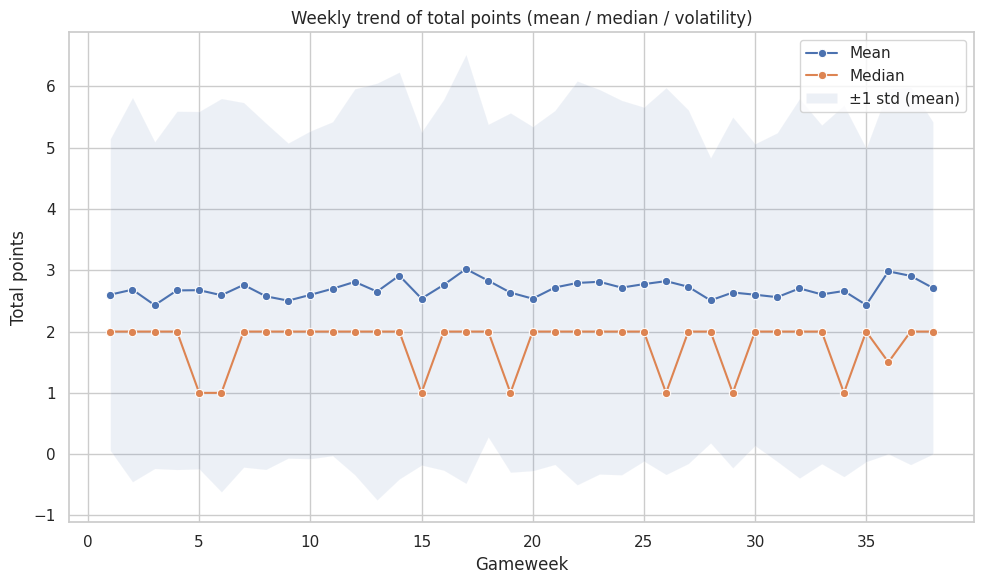

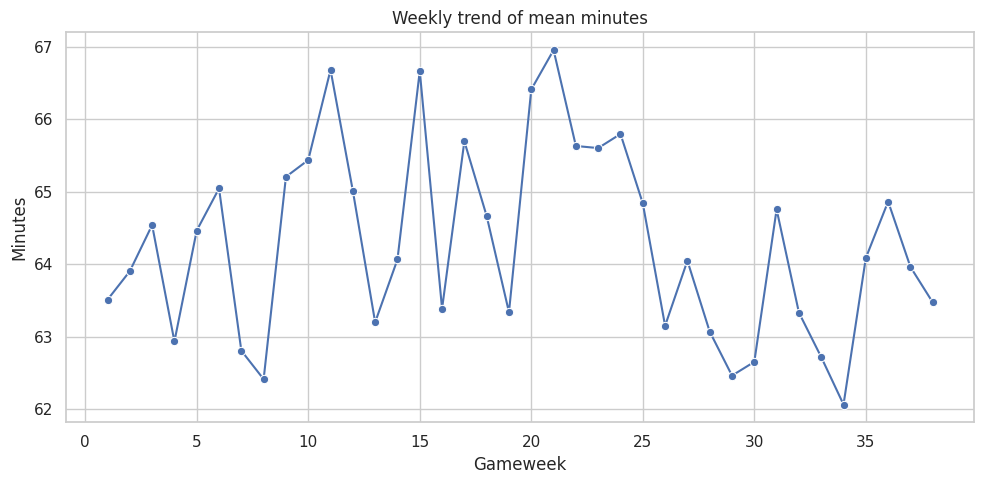

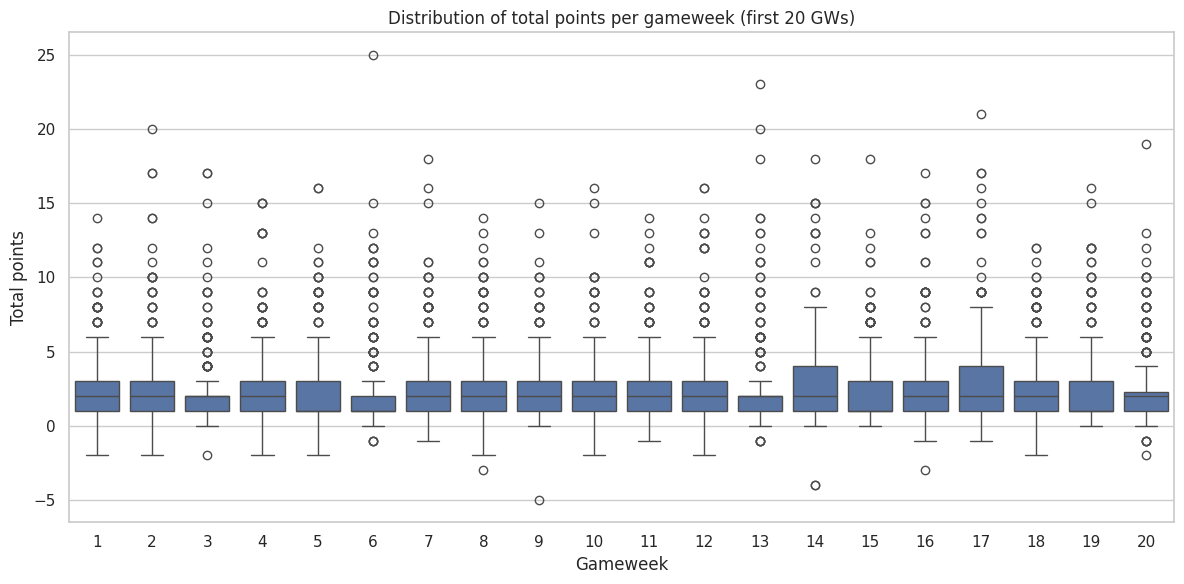

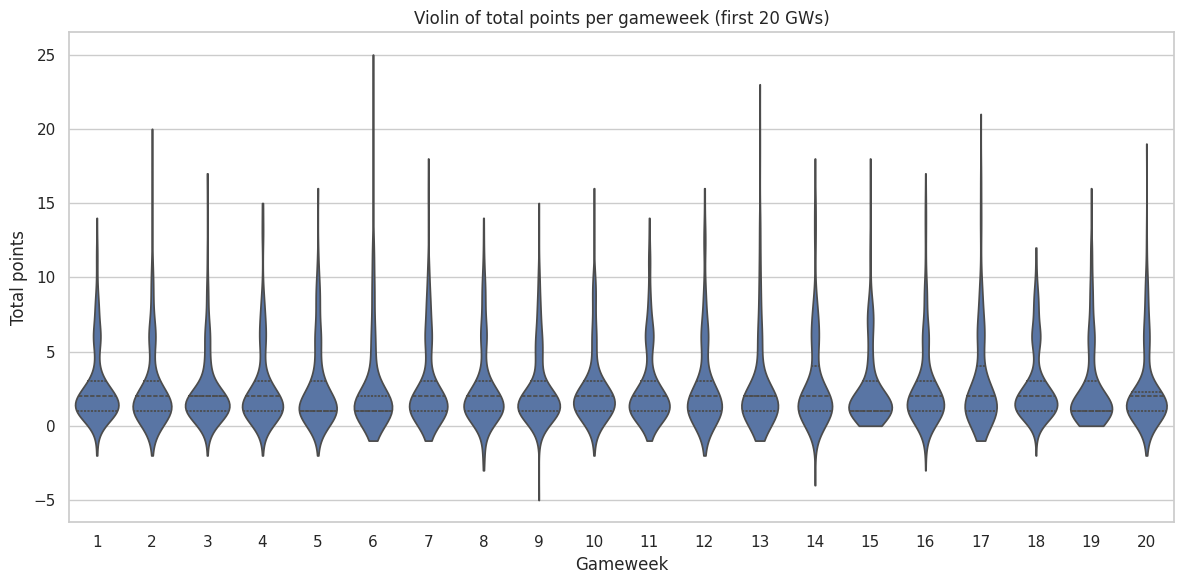


Weekly ICT means (head):
   meta_fixture_event  feature_ict_index_last_1000_days  feature_influence_last_1000_days  feature_creativity_last_1000_days  feature_threat_last_1000_days
0                   1                          0.000000                          0.000000                           0.000000                       0.000000
1                   2                          1.758096                          7.844263                           5.129956                       4.612977
2                   3                          1.417454                          6.333124                           3.986258                       3.862821
3                   4                          0.717265                          3.173688                           1.936493                       2.071084
4                   5                          0.809605                          3.602670                           2.323205                       2.171816


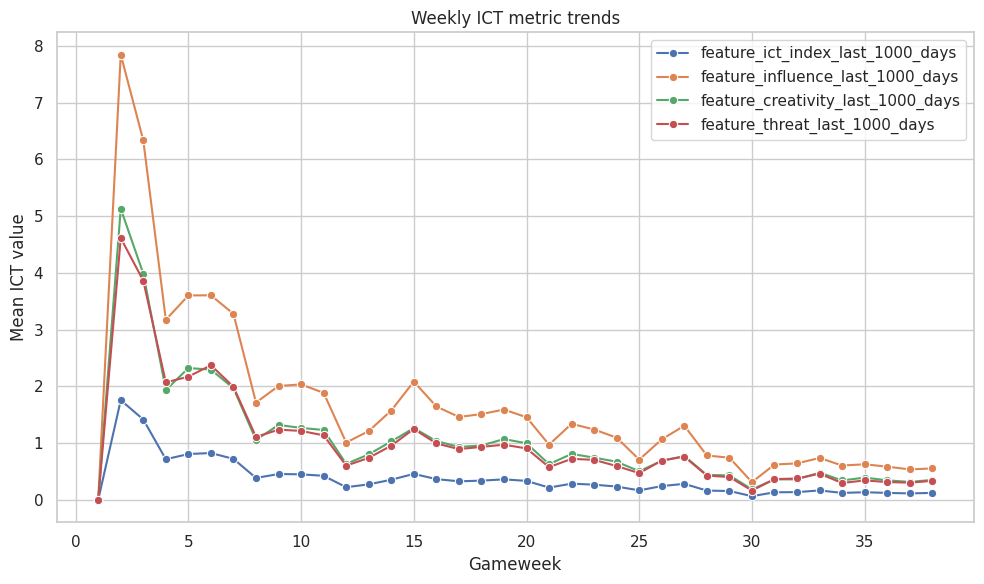

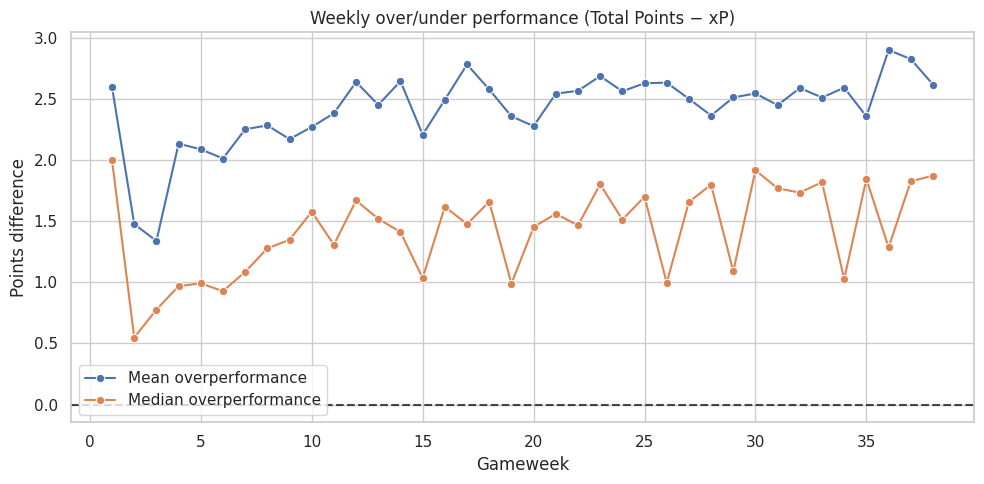

/tmp/ipython-input-116911594.py:230: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



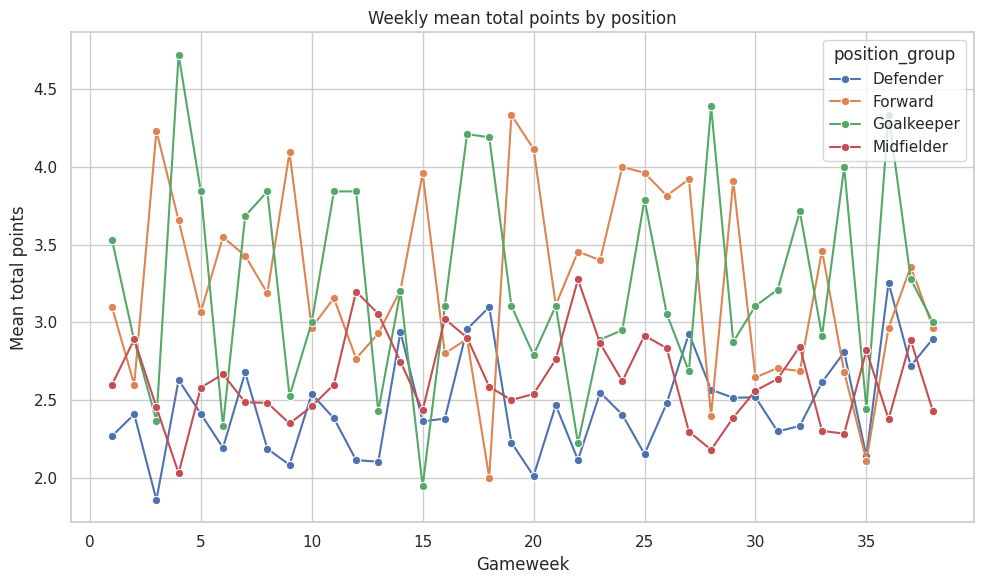

/tmp/ipython-input-116911594.py:263: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



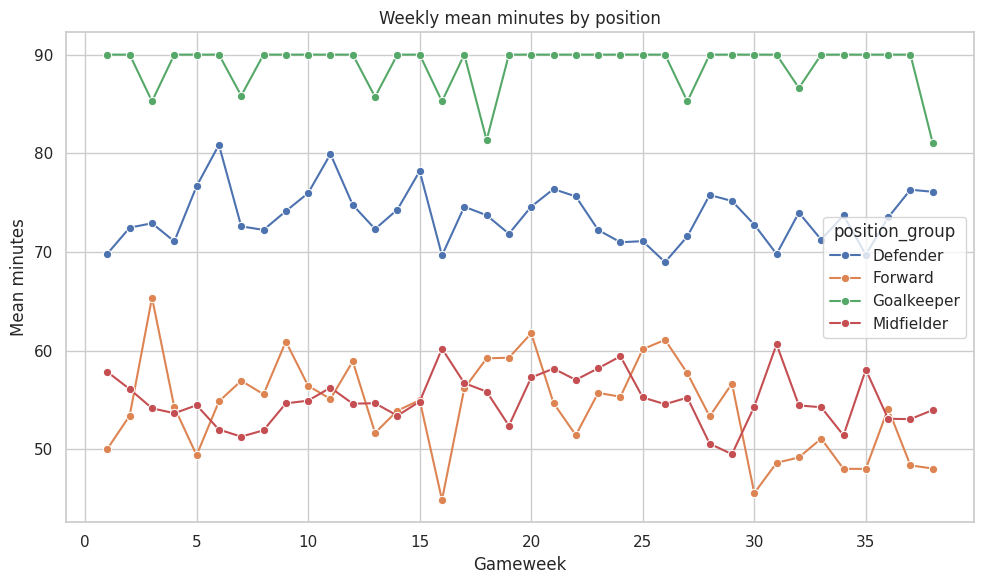

/tmp/ipython-input-116911594.py:288: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



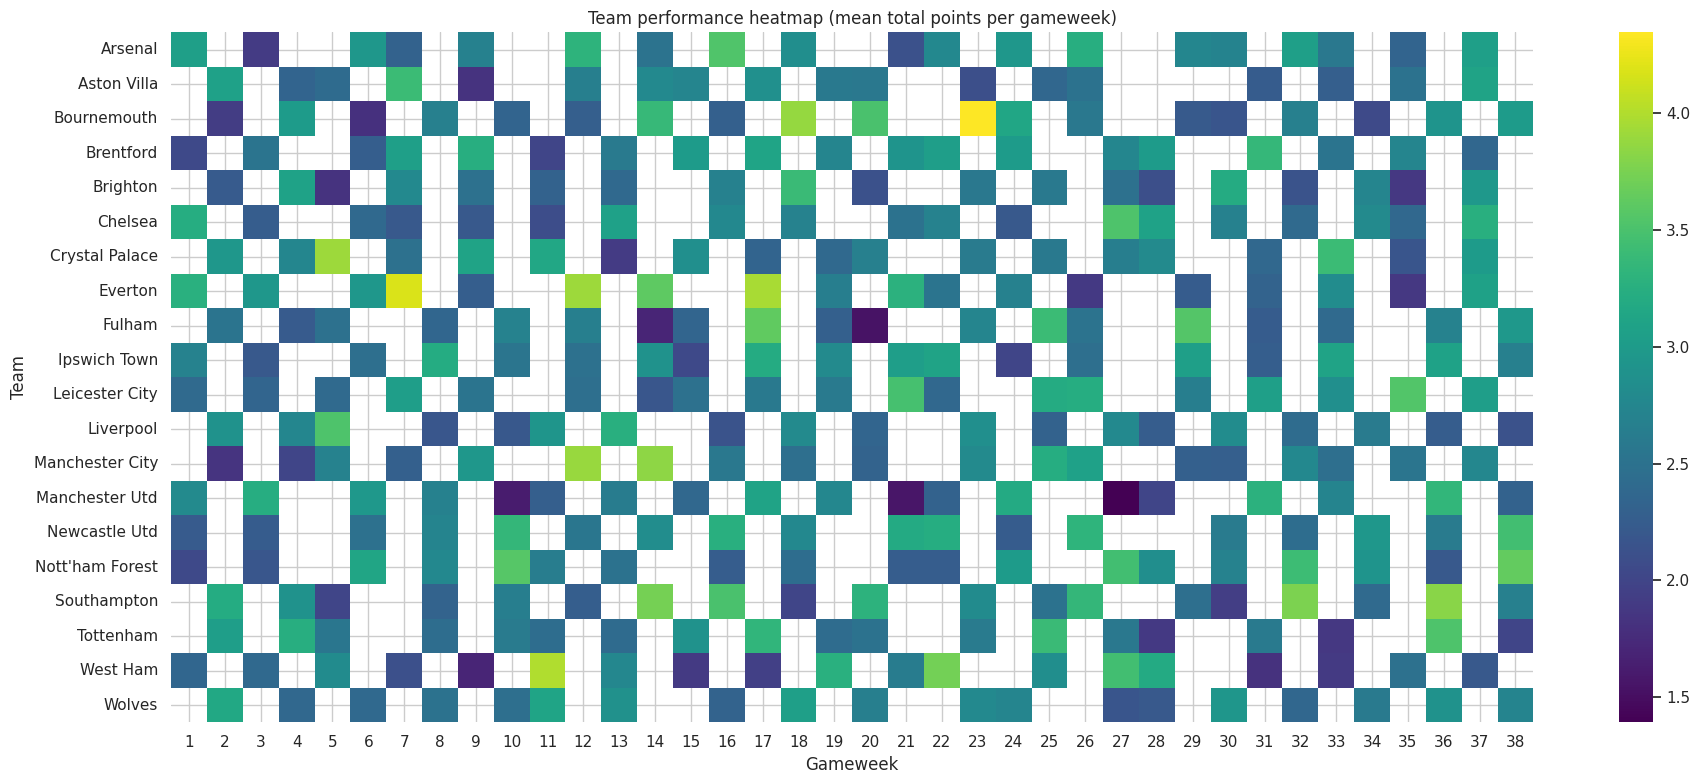

/tmp/ipython-input-116911594.py:332: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# =============================================
# 11. Weekly / Gameweek Trends (meta_fixture_event)
# =============================================

gw_col = "meta_fixture_event"

if gw_col in df.columns:
    # Make a clean GW version (and ensure no Unknown positions)
    df_gw = df.dropna(subset=[gw_col]).copy()
    if "position_group" in df_gw.columns:
        df_gw = df_gw[df_gw["position_group"] != "Unknown"].copy()
    df_gw[gw_col] = df_gw[gw_col].astype(int)


    # -------------------------------
    # 11.1 Weekly Summary Stats
    # -------------------------------
    agg_dict = {}
    if target_col in df.columns:
        agg_dict[target_col] = ["mean", "median", "std"]
    if minutes_col in df.columns:
        agg_dict[minutes_col] = ["mean", "median"]

    weekly_stats = (
        df_gw.groupby(gw_col)
             .agg(agg_dict)
             .sort_index()
    )

    # Flatten columns
    weekly_stats.columns = ["_".join(col).strip() for col in weekly_stats.columns.values]
    weekly_stats = weekly_stats.reset_index()

    print("\nWeekly summary stats (first 10 GWs):")
    print(weekly_stats.head(10))

    # Line plot: mean & median points per GW
    if target_col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.lineplot(
            data=weekly_stats,
            x=gw_col,
            y=f"{target_col}_mean",
            marker="o",
            label="Mean"
        )
        sns.lineplot(
            data=weekly_stats,
            x=gw_col,
            y=f"{target_col}_median",
            marker="o",
            label="Median"
        )
        plt.fill_between(
            weekly_stats[gw_col],
            weekly_stats[f"{target_col}_mean"] - weekly_stats[f"{target_col}_std"],
            weekly_stats[f"{target_col}_mean"] + weekly_stats[f"{target_col}_std"],
            alpha=0.1,
            label="±1 std (mean)"
        )
        plt.title("Weekly trend of total points (mean / median / volatility)")
        plt.xlabel("Gameweek")
        plt.ylabel("Total points")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plotly interactive version
        fig_week_trend = px.line(
            weekly_stats,
            x=gw_col,
            y=[f"{target_col}_mean", f"{target_col}_median"],
            title="Weekly trend of total points (mean & median)",
            markers=True,
            labels={gw_col: "Gameweek", "value": "Points", "variable": "Statistic"},
            template="plotly_white"
        )
        fig_week_trend.show()

    # Minutes per GW
    if minutes_col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.lineplot(
            data=weekly_stats,
            x=gw_col,
            y=f"{minutes_col}_mean",
            marker="o"
        )
        plt.title("Weekly trend of mean minutes")
        plt.xlabel("Gameweek")
        plt.ylabel("Minutes")
        plt.tight_layout()
        plt.show()

    # -------------------------------
    # 11.2 Distribution per Week
    # -------------------------------
    if target_col in df.columns:
        # Boxplot per GW (limited to avoid overcrowding)
        max_gws = df_gw[gw_col].nunique()
        # If many GWs, only show first 20 or so
        gw_limit = min(20, max_gws)
        subset_box = df_gw[df_gw[gw_col] <= df_gw[gw_col].sort_values().unique()[gw_limit-1]]

        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=subset_box,
            x=gw_col,
            y=target_col
        )
        plt.title(f"Distribution of total points per gameweek (first {gw_limit} GWs)")
        plt.xlabel("Gameweek")
        plt.ylabel("Total points")
        plt.tight_layout()
        plt.show()

        # Violin plot for richer shape
        plt.figure(figsize=(12, 6))
        sns.violinplot(
            data=subset_box,
            x=gw_col,
            y=target_col,
            inner="quartile",
            cut=0
        )
        plt.title(f"Violin of total points per gameweek (first {gw_limit} GWs)")
        plt.xlabel("Gameweek")
        plt.ylabel("Total points")
        plt.tight_layout()
        plt.show()

    # -------------------------------
    # 11.3 Weekly ICT Trends
    # -------------------------------
    if len(ict_cols) > 0:
        weekly_ict = (
            df_gw.groupby(gw_col)[ict_cols]
                 .mean()
                 .reset_index()
                 .sort_values(gw_col)
        )
        print("\nWeekly ICT means (head):")
        print(weekly_ict.head())

        # Seaborn lineplot for each ICT metric
        plt.figure(figsize=(10, 6))
        for col in ict_cols:
            sns.lineplot(
                data=weekly_ict,
                x=gw_col,
                y=col,
                marker="o",
                label=col
            )
        plt.title("Weekly ICT metric trends")
        plt.xlabel("Gameweek")
        plt.ylabel("Mean ICT value")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plotly interactive version – melted
        ict_melt = weekly_ict.melt(id_vars=[gw_col], value_vars=ict_cols,
                                   var_name="ICT_metric", value_name="value")
        fig_ict_week = px.line(
            ict_melt,
            x=gw_col,
            y="value",
            color="ICT_metric",
            title="Weekly ICT metric trends (interactive)",
            markers=True,
            template="plotly_white"
        )
        fig_ict_week.show()

    # -------------------------------
    # 11.4 Over/Under Performance per Week
    #       (actual total points vs xP if available)
    # -------------------------------
    if target_col in df.columns and "feature_xP_last_1000_days" in df.columns:
        df_gw["overperf"] = df_gw[target_col] - df_gw["feature_xP_last_1000_days"]
        weekly_over = (
            df_gw.groupby(gw_col)["overperf"]
                 .agg(["mean", "median"])
                 .reset_index()
                 .sort_values(gw_col)
        )

        plt.figure(figsize=(10, 5))
        sns.lineplot(
            data=weekly_over,
            x=gw_col,
            y="mean",
            marker="o",
            label="Mean overperformance"
        )
        sns.lineplot(
            data=weekly_over,
            x=gw_col,
            y="median",
            marker="o",
            label="Median overperformance"
        )
        plt.axhline(0, color="black", linestyle="--", alpha=0.7)
        plt.title("Weekly over/under performance (Total Points − xP)")
        plt.xlabel("Gameweek")
        plt.ylabel("Points difference")
        plt.legend()
        plt.tight_layout()
        plt.show()

        fig_over = px.line(
            weekly_over,
            x=gw_col,
            y=["mean", "median"],
            title="Weekly over/under performance (Total Points − xP)",
            markers=True,
            labels={gw_col: "Gameweek", "value": "Points difference",
                    "variable": "Statistic"},
            template="plotly_white"
        )
        fig_over.add_hline(y=0)
        fig_over.show()

    # -------------------------------
    # 11.5 Weekly Trends by Position
    # -------------------------------
    if target_col in df.columns:
        weekly_pos = (
            df_gw.groupby([gw_col, "position_group"])[target_col]
                 .mean()
                 .reset_index()
                 .sort_values([gw_col, "position_group"])
        )

        plt.figure(figsize=(10, 6))
        sns.lineplot(
            data=weekly_pos,
            x=gw_col,
            y=target_col,
            hue="position_group",
            marker="o"
        )
        plt.title("Weekly mean total points by position")
        plt.xlabel("Gameweek")
        plt.ylabel("Mean total points")
        plt.tight_layout()
        plt.show()

        fig_week_pos = px.line(
            weekly_pos,
            x=gw_col,
            y=target_col,
            color="position_group",
            title="Weekly mean total points by position (interactive)",
            markers=True,
            template="plotly_white"
        )
        fig_week_pos.show()

    if minutes_col in df.columns:
        weekly_pos_mins = (
            df_gw.groupby([gw_col, "position_group"])[minutes_col]
                 .mean()
                 .reset_index()
        )

        plt.figure(figsize=(10, 6))
        sns.lineplot(
            data=weekly_pos_mins,
            x=gw_col,
            y=minutes_col,
            hue="position_group",
            marker="o"
        )
        plt.title("Weekly mean minutes by position")
        plt.xlabel("Gameweek")
        plt.ylabel("Mean minutes")
        plt.tight_layout()
        plt.show()

    # -------------------------------
    # 11.6 Weekly Team Heatmaps
    # -------------------------------
    if team_col and target_col in df.columns:
        # Mean points per team & week
        team_week = (
            df_gw.groupby([team_col, gw_col])[target_col]
                 .mean()
                 .reset_index()
        )
        pivot_team_week = team_week.pivot(
            index=team_col, columns=gw_col, values=target_col
        )

        plt.figure(figsize=(max(12, pivot_team_week.shape[1] * 0.5), 8))
        sns.heatmap(
            pivot_team_week,
            cmap="viridis",
            annot=False
        )
        plt.title("Team performance heatmap (mean total points per gameweek)")
        plt.xlabel("Gameweek")
        plt.ylabel("Team")
        plt.tight_layout()
        plt.show()

        # Plotly interactive heatmap
        fig_heat = px.imshow(
            pivot_team_week,
            labels=dict(x="Gameweek", y="Team", color="Mean points"),
            title="Team performance heatmap (mean total points per gameweek)",
            template="plotly_white",
            aspect="auto"
        )
        fig_heat.show()

    # -------------------------------
    # 11.7 Weekly ICT Radar (latest GW)
    # -------------------------------
    if len(ict_cols) >= 3 and target_col in df.columns:
        # Pick latest GW with enough data
        latest_gw = int(df_gw[gw_col].max())
        gw_latest_df = df_gw[df_gw[gw_col] == latest_gw].copy()

        core_ict = [c for c in ict_cols if "influence" in c.lower()
                                       or "creativity" in c.lower()
                                       or "threat" in c.lower()]
        core_ict = list(dict.fromkeys(core_ict))
        if len(core_ict) >= 3:
            radar_latest = (
                gw_latest_df.groupby("position_group")[core_ict]
                           .mean()
                           .reset_index()
            )

            fig_week_radar = go.Figure()
            categories = core_ict

            for _, row in radar_latest.iterrows():
                fig_week_radar.add_trace(go.Scatterpolar(
                    r=row[categories].values,
                    theta=categories,
                    fill='toself',
                    name=f"{row['position_group']} (GW {latest_gw})"
                ))

            fig_week_radar.update_layout(
                title=f"ICT radar by position – latest gameweek (GW {latest_gw})",
                polar=dict(radialaxis=dict(visible=True)),
                showlegend=True,
                template="plotly_white"
            )
            fig_week_radar.show()

else:
    print("meta_fixture_event (gameweek column) not found in df.")


/tmp/ipython-input-3181159239.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



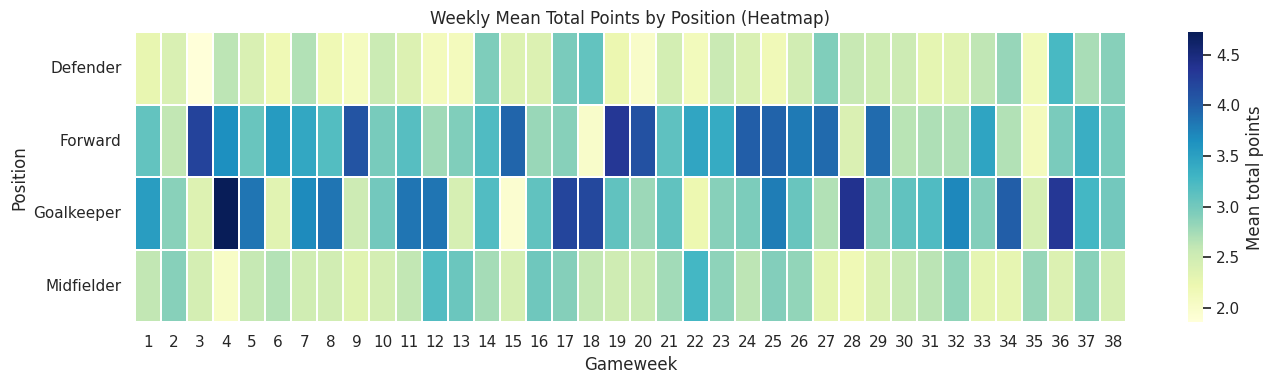

In [ ]:
# -------------------------------
# Weekly mean points by position — Heatmap
# -------------------------------

gw_col = "meta_fixture_event"
target_col = "target_total_points"

# Make sure we only use valid GWs and positions
df_gw = df.dropna(subset=[gw_col]).copy()
df_gw[gw_col] = df_gw[gw_col].astype(int)

# If you already filtered Unknown before, this is just extra safety:
if "position_group" in df_gw.columns:
    df_gw = df_gw[df_gw["position_group"] != "Unknown"].copy()

# 1) Compute weekly mean points by position
weekly_pos = (
    df_gw.groupby([gw_col, "position_group"])[target_col]
         .mean()
         .reset_index()
         .sort_values([gw_col, "position_group"])
)

# 2) Pivot to Position × Gameweek matrix
heat = weekly_pos.pivot(
    index="position_group",
    columns=gw_col,
    values=target_col
)

# 3) Plot heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(
    heat,
    cmap="YlGnBu",
    linewidths=0.3,
    linecolor="white",
    annot=False,        # set True if you want numbers inside cells
    cbar_kws={"label": "Mean total points"}
)
plt.title("Weekly Mean Total Points by Position (Heatmap)")
plt.xlabel("Gameweek")
plt.ylabel("Position")
plt.tight_layout()
plt.show()
